# EDA on the `MLA_100k_checked_v3` dataset

In [291]:
import matplotlib.pyplot as plt
from typing import Literal
import pandas as pd
import numpy as np
import seaborn as sns
from new_or_used import build_dataset


## Load the dataset

In [292]:
X_train, y_train, X_test, y_test = build_dataset()
print(X_train[0], y_train[0])


{'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}}, 'warranty': None, 'sub_status': [], 'deal_ids': [], 'base_price': 80.0, 'shipping': {'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}, 'non_mercado_pago_payment_methods': [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 'seller_id': 8208882349, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 80.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA6553902747', 'coverage_areas': [], 'category_id': 'MLA126406', 'descriptions': ["{'id': 'MLA4695330653-912855983'}"], 'last_updated': '2015-09-

In [293]:
X_dataframe = pd.DataFrame(X_train)
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,...,1446669773000,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,...,1448474910000,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,...,1447027027000,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,...,1449191596000,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,...,1445638040000,active,None,NaN,None,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1


In [294]:
# I want to add the "used" column to the analysis
X_dataframe["used"] = [i == "used" for i in y_train]
X_dataframe["used"] = X_dataframe["used"].astype(int)

## Check the information in the dataset to see if the information is valuable

In [295]:
print(len(X_dataframe.columns))
X_dataframe.columns

45


Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity', 'used'],
      dtype='object')

In [296]:
# Let's check if there are columns in which all the values have no information
unuseful_columns = []

for col in X_dataframe.columns:
    # if it's a dictionary, is useful for the time being
    if isinstance(X_dataframe[col].iloc[0], dict):
        continue
    # if it's a list, check if all of them the same
    elif isinstance(X_dataframe[col].iloc[0], list):
        if X_dataframe[col].iloc[0] == []:
            if len(X_dataframe[col].value_counts()) == 1:
                unuseful_columns.append(col)
    else:
        if X_dataframe[col].nunique() == 1 or X_dataframe[col].nunique() == 0:
            unuseful_columns.append(col)

In [297]:
unuseful_columns

['site_id',
 'listing_source',
 'coverage_areas',
 'international_delivery_mode',
 'differential_pricing',
 'subtitle']

In [298]:
X_dataframe.drop(unuseful_columns, axis=1, inplace=True)
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,...,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,...,1446669773000,active,None,NaN,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,...,1448474910000,active,None,NaN,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,...,1447027027000,active,None,NaN,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,...,1449191596000,active,None,NaN,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,...,1445638040000,active,None,NaN,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1


## Now, some analysis for each column

In [299]:
X_dataframe.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'listing_type_id', 'price', 'attributes', 'buying_mode',
       'tags', 'parent_item_id', 'category_id', 'descriptions', 'last_updated',
       'pictures', 'id', 'official_store_id', 'accepts_mercadopago',
       'original_price', 'currency_id', 'thumbnail', 'title',
       'automatic_relist', 'date_created', 'secure_thumbnail', 'stop_time',
       'status', 'video_id', 'catalog_product_id', 'initial_quantity',
       'start_time', 'permalink', 'sold_quantity', 'available_quantity',
       'used'],
      dtype='object')

In [300]:
def column_analysis(column: str, df: pd.DataFrame)  -> pd.DataFrame:
    """
    This function is used to analize the distribution of the used items in a column
    It returns a dataframe with the number of items in each value, the proportion of used items and the 95% confidence interval
    using the Wilson score interval

    Args:
        column: str, the column to analyze
        df: pd.DataFrame, the dataframe to analyze

    Returns:
        pd.DataFrame, a dataframe with the number of items in each value, the proportion of used items and the confidence interval
    """
    used_percentage_by_value = df.groupby(column)["used"].mean()
    n = df.groupby(column)["used"].size()

    den = 1 + (1.96**2)/n
    center = (used_percentage_by_value + (1.96**2) / (2 * n)) / den
    adj = (
        1.96
        * np.sqrt(
            (used_percentage_by_value * (1 - used_percentage_by_value) / n)
            + (1.96**2) / (4 * n**2)
        )
    ) / den

    wilson_low = center - adj
    wilson_high = center + adj

    res = pd.DataFrame(
        {
            "n": n,
            "prop_used": used_percentage_by_value,
            "ci_lower": wilson_low,
            "ci_upper": wilson_high,
        }
    ).sort_values("prop_used", ascending=False)

    return res


def plot_column_analysis(res: pd.DataFrame) -> None:
    """
    This function is used to plot the distribution of the used items in a column
    It returns a plot with the point estimate and the 95% confidence interval

    Args:
        res: pd.DataFrame, a dataframe with the number of items in each value, the proportion of 
        used items and the confidence interval

    Returns:
        None
    """
    x = np.arange(len(res))
    y = res["prop_used"].values
    yerr = np.vstack([y - res["ci_lower"].values, res["ci_upper"].values - y])

    plt.errorbar(x, y, yerr=yerr, fmt="o", capsize=4)
    plt.xticks(x, res.index, rotation=45, ha="right")
    plt.ylabel("Proportion used (used=1, new=0)")
    plt.title("Proportion of used items by category with 95% CI")
    plt.tight_layout()
    plt.show()


def look_for_likely_to_be_used(res: pd.DataFrame, threshold: float = 0.75) -> pd.DataFrame:
    """
    This function is used to find the values in a column that are likely to be used
    It returns a dataframe with the values that have a proportion of used items greater
    than the threshold and a confidence interval greater than 0.5

    Args:
        res: pd.DataFrame, a dataframe with the number of items in each value, the proportion of 
            used items and the confidence interval
        threshold: float, the threshold for the proportion of used items

    Returns:
        pd.DataFrame, a dataframe with the values that have a proportion of used items greater than 
        the threshold and a confidence interval greater than 0.5
    """
    return res[(res["prop_used"] > threshold) & (res["ci_lower"] > 0.5)]


def look_for_likely_to_be_new(res: pd.DataFrame, threshold: float = 0.25):
    """
    This function is used to find the values in a column that are likely to be new
    It returns a dataframe with the values that have a proportion of used items less than the threshold and a confidence interval less than 0.5

    Args:
        res: pd.DataFrame, a dataframe with the number of items in each value, the proportion of used items and the confidence interval
    
    Returns:
        pd.DataFrame, a dataframe with the values that have a proportion of used items less than the threshold and a confidence interval 
        less than 0.5
    """
    return res[(res["prop_used"] < threshold) & (res["ci_upper"] < 0.5)]

### Seller Address

In [252]:
X_dataframe["seller_address"].describe()

count                                                 90000
unique                                                 3803
top       {'country': {'name': 'Argentina', 'id': 'AR'},...
freq                                                   3693
Name: seller_address, dtype: object

In [253]:
X_dataframe["seller_address"].isna().sum() + X_dataframe["seller_address"].isnull().sum()

np.int64(0)

There are only 3803 seller addresses for all the 90k items

In [254]:
X_dataframe["seller_address"].iloc[0]

{'country': {'name': 'Argentina', 'id': 'AR'},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'},
 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}}

In [255]:
X_dataframe["seller_address_country"] = X_dataframe["seller_address"].apply(
    lambda x: x["country"]["name"]
)
X_dataframe["seller_address_state"] = X_dataframe["seller_address"].apply(lambda x: x["state"]["name"])
X_dataframe["seller_address_city"] = X_dataframe["seller_address"].apply(lambda x: x["city"]["name"])
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,...,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,seller_address_country,seller_address_state,seller_address_city
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,...,NaN,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,Argentina,Capital Federal,San Cristóbal
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,...,NaN,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,Argentina,Capital Federal,Buenos Aires
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,...,NaN,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,Argentina,Capital Federal,Boedo
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,...,NaN,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,Argentina,Capital Federal,Floresta
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,...,NaN,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,Argentina,Buenos Aires,Tres de febrero


#### Seller Country

In [256]:
X_dataframe["seller_address_country"].value_counts()

seller_address_country
Argentina    89999
                 1
Name: count, dtype: int64

In [257]:
X_dataframe.drop(columns=["seller_address_country"], inplace=True)

#### Seller State

In [258]:
X_dataframe["seller_address_state"].value_counts()

seller_address_state
Capital Federal        52143
Buenos Aires           31482
Santa Fe                2398
Córdoba                 1727
Mendoza                  400
Chubut                   335
Entre Ríos               249
Tucumán                  214
San Juan                 132
Salta                    131
Misiones                 122
Río Negro                119
Corrientes               110
Neuquén                   87
La Pampa                  70
Chaco                     69
San Luis                  56
Jujuy                     33
Formosa                   28
Santiago del Estero       26
Santa Cruz                22
Catamarca                 20
La Rioja                  16
Tierra del Fuego          10
                           1
Name: count, dtype: int64

In [259]:
res = column_analysis("seller_address_state", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
,1,1.000000,0.206543,1.000000
Tierra del Fuego,10,0.800000,0.490157,0.943319
Jujuy,33,0.787879,0.622480,0.893241
San Luis,56,0.642857,0.511936,0.755436
La Rioja,16,0.625000,0.386406,0.815190
Formosa,28,0.571429,0.390705,0.734917
Entre Ríos,249,0.570281,0.508184,0.630242
Neuquén,87,0.528736,0.424862,0.630179
Río Negro,119,0.504202,0.415653,0.592488


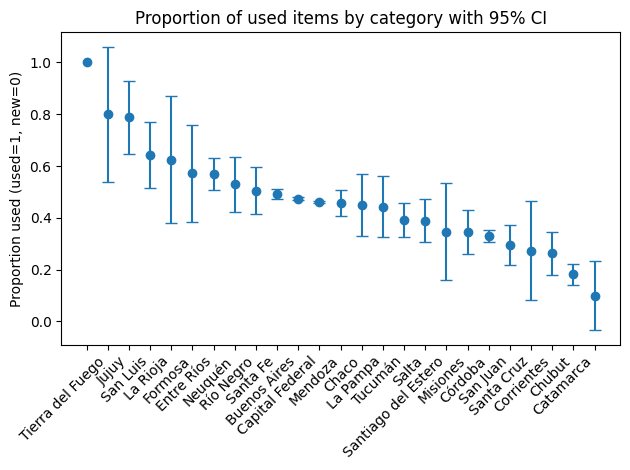

In [18]:
plot_column_analysis(res)

In [19]:
likely_to_be_used_by_state = look_for_likely_to_be_used(res, threshold=0.75)
likely_to_be_used_by_state

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
Tierra del Fuego,10,0.800000,0.538667,1.061333
Jujuy,33,0.787879,0.646233,0.929524


In [20]:
likely_to_be_new_by_state = look_for_likely_to_be_new(res, threshold=0.25)
likely_to_be_new_by_state

,n,prop_used,ci_lower,ci_upper
seller_address_state,,,,
Chubut,335,0.18209,0.140701,0.223478
Catamarca,20,0.10000,-0.034896,0.234896


#### Seller City

In [260]:
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(typical_string_processing)
X_dataframe["seller_address_city"].value_counts()

seller_address_city
capital federal                   5805
buenos aires                      5801
caba                              5309
palermo                           3046
caballito                         2710
                                  ... 
beccar, partido de san isidro.       1
paso de rey                          1
embalse                              1
tre de febrero                       1
almafuerte                           1
Name: count, Length: 2367, dtype: int64

In [275]:
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(lambda x: x.replace(".", "")).apply(
    lambda x: x.replace("federal", "")
).apply(lambda x: "caba" if x == "ciudad autonoma de buenos aires" else x).apply(
    lambda x: "capital" if x == "bs as" else x
).apply(
    lambda x: "capital" if x == "buenos aires" else x
).apply(
    typical_string_processing
)

In [276]:
print(len(X_dataframe["seller_address_city"].unique()))
relevant_cities = X_dataframe["seller_address_city"].value_counts()[:20].index
X_dataframe["seller_address_city"].value_counts()[:100]

2289


seller_address_city
capital                12780
caba                    6522
palermo                 3046
caballito               2715
belgrano                2113
                       ...  
jose c paz               171
constitucion             167
adrogue                  166
san andres de giles      165
florencio varela         164
Name: count, Length: 100, dtype: int64

In [277]:
relevant_cities = X_dataframe["seller_address_city"].value_counts()[:100].index
relevant_cities

Index(['capital', 'caba', 'palermo', 'caballito', 'belgrano', 'rosario',
       'flores', 'villa crespo', 'mataderos', 'lanus', 'almagro', 'avellaneda',
       'balvanera', 'mar del plata', 'la plata', 'cordoba', 'san isidro',
       'general san martin', 'recoleta', 'quilmes', 'floresta',
       'villa urquiza', 'vicente lopez', 'lomas de zamora', 'congreso',
       'moron', 'microcentro', 'ituzaingo', 'san nicolas', 'ramos mejia',
       'san telmo', 'villa devoto', 'boedo', 'martinez', 'nuñez', 'olivos',
       'villa del parque', 'caseros', 'bragado', 'monserrat', 'paternal',
       'once', 'barracas', 'villa pueyrredon', 'tribunales', 'pilar',
       'ciudadela', 'san martin', 'tigre', 'san cristobal', 'hurlingham',
       'ciudad madero', 'colegiales', 'retiro', 'saavedra', 'bahia blanca',
       'merlo', 'castelar', 'liniers', 'munro', 'villa ballester',
       'berazategui', 'san miguel', 'monte grande', 'san justo', 'la matanza',
       'san fernando', 'parque chacabuco', 'tre

In [280]:
res = column_analysis("seller_address_city", X_dataframe.loc[X_dataframe["seller_address_city"].isin(relevant_cities)])
display(res)

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
bragado,448,0.988839,0.974143,0.995224
san andres de giles,165,0.969697,0.931032,0.986989
coghlan,179,0.815642,0.752413,0.865609
san antonio de padua,186,0.806452,0.743708,0.856792
la boca,174,0.775862,0.708324,0.831482
...,...,...,...,...
trelew,272,0.147059,0.109890,0.194058
jose c paz,171,0.146199,0.101029,0.206916
mataderos,1412,0.112606,0.097158,0.130157


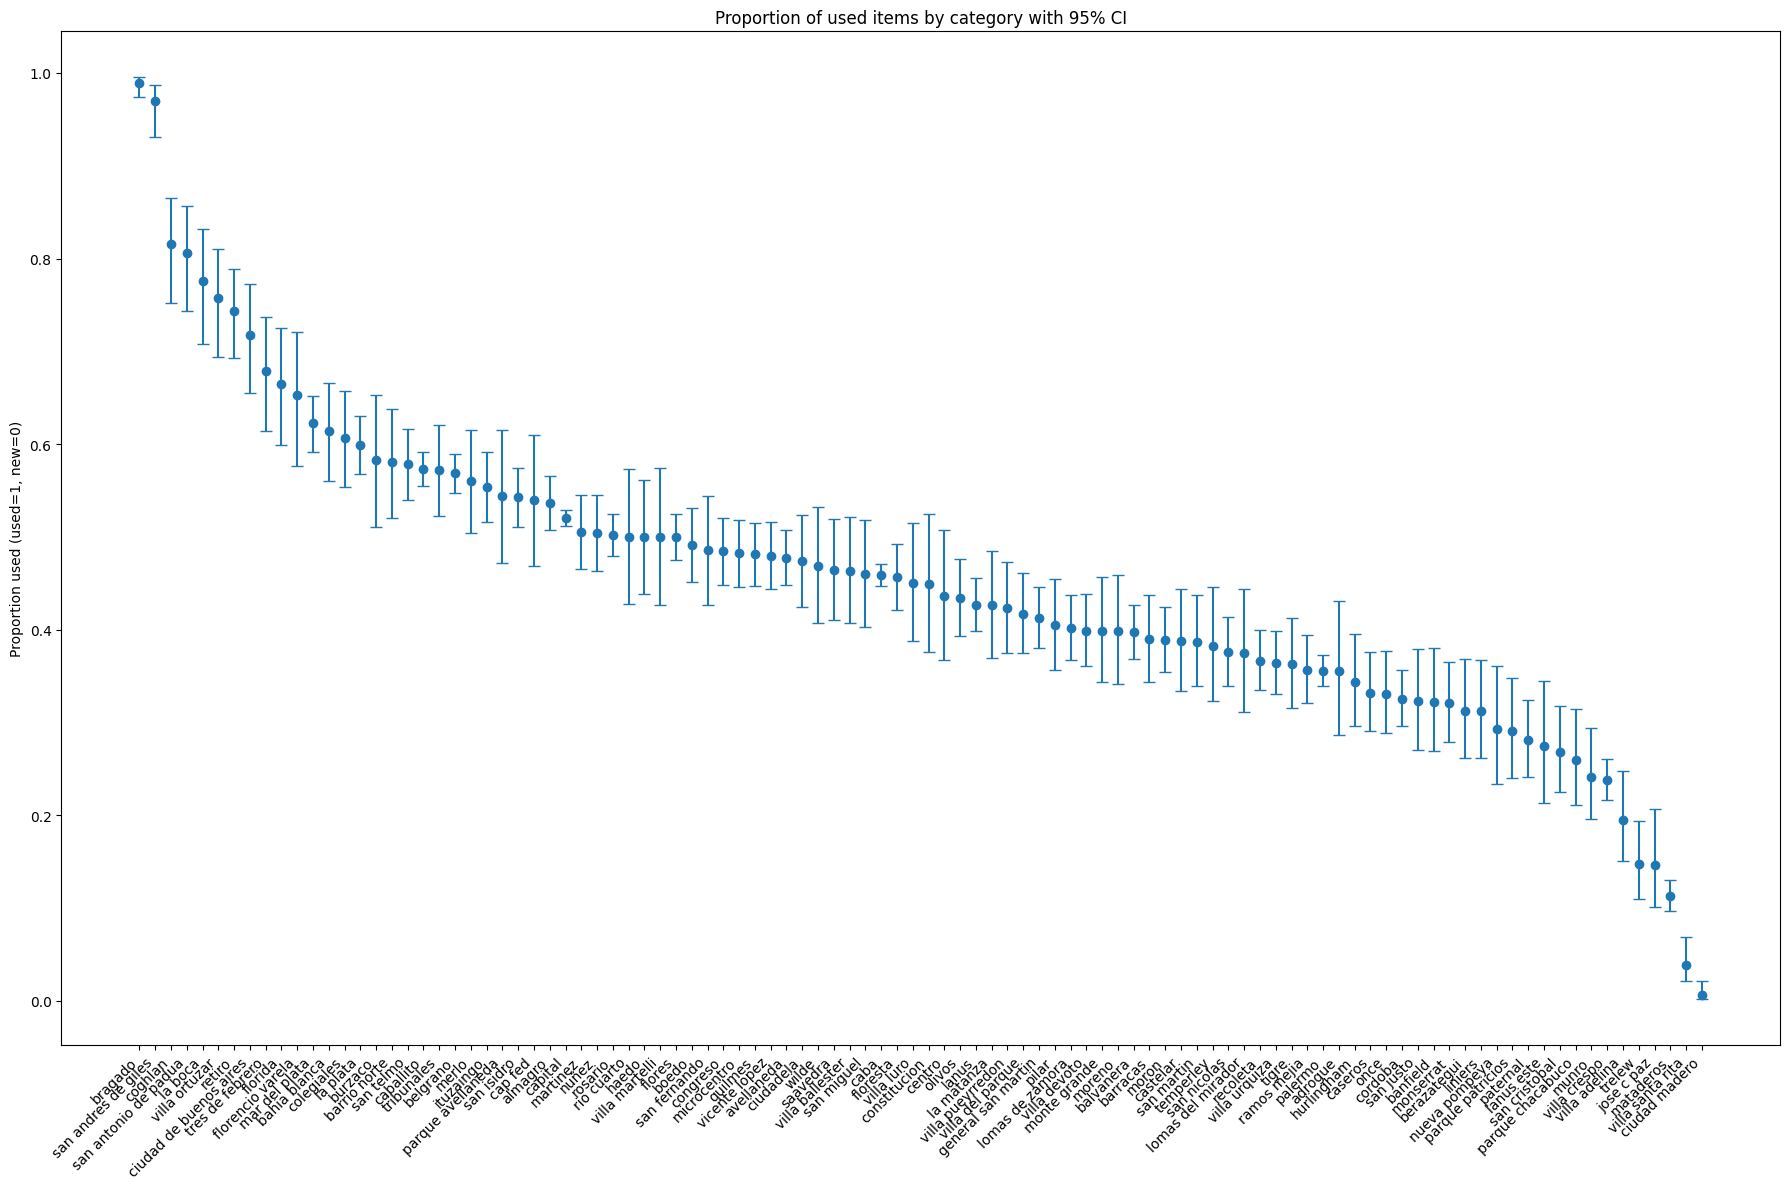

In [281]:
plt.figure(figsize=(18, 12))
plot_column_analysis(res)

In [285]:
likely_to_be_used_by_city = look_for_likely_to_be_used(res, threshold=0.75)
likely_to_be_used_by_city

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
bragado,448,0.988839,0.974143,0.995224
san andres de giles,165,0.969697,0.931032,0.986989
coghlan,179,0.815642,0.752413,0.865609
san antonio de padua,186,0.806452,0.743708,0.856792
la boca,174,0.775862,0.708324,0.831482
villa ortuzar,206,0.757282,0.694372,0.810771


In [287]:
likely_to_be_used_by_city.index

Index(['bragado', 'san andres de giles', 'coghlan', 'san antonio de padua',
       'la boca', 'villa ortuzar'],
      dtype='object', name='seller_address_city')

In [284]:
likely_to_be_new_by_city = look_for_likely_to_be_new(res, threshold=0.25)
likely_to_be_new_by_city

,n,prop_used,ci_lower,ci_upper
seller_address_city,,,,
munro,294,0.241497,0.196110,0.293552
villa crespo,1434,0.237796,0.216480,0.260514
villa adelina,252,0.194444,0.150319,0.247746
trelew,272,0.147059,0.109890,0.194058
jose c paz,171,0.146199,0.101029,0.206916
mataderos,1412,0.112606,0.097158,0.130157
villa santa rita,261,0.038314,0.020942,0.069080
ciudad madero,341,0.005865,0.001610,0.021130


In [288]:
likely_to_be_new_by_city.index

Index(['munro', 'villa crespo', 'villa adelina', 'trelew', 'jose c paz',
       'mataderos', 'villa santa rita', 'ciudad madero'],
      dtype='object', name='seller_address_city')

In [286]:
actual_relevant_cities = list(likely_to_be_used_by_city.index) + list(likely_to_be_new_by_city.index)
actual_relevant_cities = list(likely_to_be_used_by_city.index) + list(likely_to_be_new_by_city.index)
X_dataframe["seller_address_city"] = X_dataframe["seller_address_city"].apply(lambda x: x if x in actual_relevant_cities else "other")
X_dataframe["seller_address_city"].value_counts()

seller_address_city
other                   84205
villa crespo             1434
mataderos                1412
bragado                   448
ciudad madero             341
munro                     294
trelew                    272
villa santa rita          261
villa adelina             252
villa ortuzar             206
san antonio de padua      186
coghlan                   179
la boca                   174
jose c paz                171
san andres de giles       165
Name: count, dtype: int64

### Seller ID

In [175]:
X_dataframe["seller_id"].value_counts()[:50]

seller_id
5248662274    850
2015548469    654
7704929703    424
4631246902    408
8612126795    318
2266082781    302
6972484560    259
6846806944    251
4248718919    244
1387735603    240
8326621157    211
7772844348    209
2373910598    208
7694743641    183
3135396608    164
7672071434    163
6538753635    160
2024252139    159
8980863521    155
8918336477    149
5749908984    146
4226059250    146
6537535599    143
7394370231    139
6832522378    138
6029888950    138
4838664540    136
8220549814    136
8435804226    132
2122542660    129
3846095764    128
4755818264    123
8516415845    122
7060837357    122
6645536870    122
5255978862    121
7394214410    117
7835318510    111
3884593281    110
6396603751    109
9840215628    106
4014611326    106
7740664679    105
6884045011    104
7106323686    103
4131433201     99
2898941868     99
2874645086     98
1833552445     98
2810172868     97
Name: count, dtype: int64

In [176]:
# Check if the seller id is repeated more than 100 times
popular_sellers = X_dataframe["seller_id"].value_counts().loc[lambda x: x > 100].index
X_dataframe["popular_seller"]= X_dataframe["seller_id"].apply(lambda x: x in popular_sellers)
X_dataframe["popular_seller"].value_counts()


popular_seller
False    81197
True      8803
Name: count, dtype: int64

In [177]:
popular_sellers

Index([5248662274, 2015548469, 7704929703, 4631246902, 8612126795, 2266082781,
       6972484560, 6846806944, 4248718919, 1387735603, 8326621157, 7772844348,
       2373910598, 7694743641, 3135396608, 7672071434, 6538753635, 2024252139,
       8980863521, 8918336477, 5749908984, 4226059250, 6537535599, 7394370231,
       6832522378, 6029888950, 4838664540, 8220549814, 8435804226, 2122542660,
       3846095764, 4755818264, 8516415845, 7060837357, 6645536870, 5255978862,
       7394214410, 7835318510, 3884593281, 6396603751, 9840215628, 4014611326,
       7740664679, 6884045011, 7106323686],
      dtype='int64', name='seller_id')

In [179]:
res = column_analysis("seller_id", X_dataframe.loc[X_dataframe["seller_id"].isin(popular_sellers)])
display(res)

,n,prop_used,ci_lower,ci_upper
seller_id,,,,
6645536870,122,1.000000,9.694727e-01,1.000000
3846095764,128,1.000000,9.708620e-01,1.000000
6832522378,138,1.000000,9.729163e-01,1.000000
7394214410,117,1.000000,9.682096e-01,1.000000
4014611326,106,1.000000,9.650260e-01,1.000000
4755818264,123,1.000000,9.697134e-01,1.000000
8918336477,149,1.000000,9.748655e-01,1.000000
2024252139,159,1.000000,9.764090e-01,1.000000
4631246902,408,0.995098,9.823050e-01,0.998655


In [180]:
popular_used_sellers = look_for_likely_to_be_used(res, threshold=0.8)
popular_new_sellers = look_for_likely_to_be_new(res, threshold=0.2)
X_dataframe["seller_id"] = X_dataframe["seller_id"].apply(lambda x: "popular used seller" if x in popular_used_sellers.index else "popular new seller" if x in popular_new_sellers.index else "other")

X_dataframe["seller_id"].value_counts()

seller_id
other                  81466
popular new seller      4437
popular used seller     4097
Name: count, dtype: int64

In [184]:
popular_new_sellers.index

Index([8980863521, 5248662274, 3884593281, 7106323686, 2266082781, 8612126795,
       2373910598, 8435804226, 7835318510, 7060837357, 7772844348, 6396603751,
       7704929703, 2015548469, 6846806944, 7394370231, 1387735603],
      dtype='int64', name='seller_id')

In [29]:
X_dataframe.drop(columns=["seller_id"], inplace=True)
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,variations,listing_type_id,price,...,video_id,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,last_updated_date,popular_seller
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,80.0,...,None,NaN,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,2015-09-05,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,2650.0,...,None,NaN,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,2015-09-26,False
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,60.0,...,None,NaN,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,2015-09-09,False
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,580.0,...,None,NaN,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,2015-10-05,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,30.0,...,None,NaN,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,2015-08-28,False


### Warranty

In [303]:
X_dataframe["warranty"].describe()

count     35243
unique     9536
top          Sí
freq       5107
Name: warranty, dtype: object

In [304]:
X_dataframe["warranty"].value_counts()[:40]

warranty
Sí                                                                                                                                                                                                                                     5107
Sin garantía                                                                                                                                                                                                                           4907
SI                                                                                                                                                                                                                                      545
6 meses                                                                                                                                                                                                                                 489
6 MESES                                        

In [305]:
X_dataframe["warranty"].isnull().sum()

np.int64(54757)

61% of the data is empty

In [306]:
# Fill with "unknown"
X_dataframe["warranty"] = X_dataframe["warranty"].fillna("unknown")
X_dataframe["warranty"] = X_dataframe["warranty"].apply(lambda x: "unknown" if x == "" else x)
X_dataframe["warranty"].value_counts()

warranty
unknown                                                                                                                                                                                            54757
Sí                                                                                                                                                                                                  5107
Sin garantía                                                                                                                                                                                        4907
SI                                                                                                                                                                                                   545
6 meses                                                                                                                                                                                    

Still a lot of unconsistency in the warranty responses

In [350]:
def typical_string_processing(x:str) -> str:
    """
    This function removes accent marks, converts to lowercase, removes dots and trims the string

    Args:
        x: str, the string to process

    Returns:
        str, the processed string
    """
    tildes = "áéíóú"
    no_tildes = "aeiou"
    x = x.lower()
    x = x.strip()
    x = x.replace(".", "")
    for i in range(len(tildes)):
        x = x.replace(tildes[i], no_tildes[i])
    return x


def find_warranty_magnitude(x:str) -> str:
    """
    This function finds the magnitude of the warranty.
    It checks if the magnitude is in years, months, weeks or days.

    Args:
        x: str, the string to process

    Returns:
        str, the processed string


    """
    if "año" in x or "ano" in x.split(" ") or "anos" in x.split(" "):
        return "años"
    elif "mes" in x:
        return "meses"
    elif "semana" in x:
        return "semanas"
    elif "dia" in x:
        try:
            days = int(x.split("dia")[0].split(" ")[-2])
            if days > 365:
                return "años"
            elif days > 30:
                return "meses"
            elif days > 7:
                return "semanas"
            else:
                return "dias"
        except (ValueError, IndexError):
            return x
    elif "horas" in x:
        return "dias" # Hypothesis: the warranty is for 24 or 48 hours
    else:
        return x


def warranty_de_fabricacion(x:str) -> str:
    """
    This function checks if the warranty is from the factory.

    Args:
        x: str, the string to process

    Returns:
        str, the processed string
    """
    if "fabrica" in x or "origen" in x: # Hypothesis: the warranty is from the factory
        return "de fabrica"
    else:
        return x


def yes_no_warranty(x):
    if "si" in x.split(" ") or "con garantia" in x or "garantia total" in x:
        return "si"
    elif "sin garantia" in x:
        return "no"
    else:
        return x

def mireputacion_warranty(x:str) -> str:
    """
    This function checks if the warranty is a miscalification of the warranty.
    """
    if "reputacion" in x or "calificaciones" in x:
        return "reputacion"
    else:
        return x

def warranty_estado(x:str) -> str:
    """
    This function checks if in the warranty the seller mentions the state of the item.

    Args:
        x: str, the string to process

    Returns:
        str, the processed string. Can be "a nuevo", "usado", "otro", "de fabrica", "años", "meses", "semanas", "dias", "si", "no"
    """
    if x not in ["años", "meses", "semanas", "dias", "de fabrica", "si", "no", "reputacion", "calificaciones"]:
        x = typical_string_processing(x)
        if "nuevo" in x:
            return "a nuevo"
        elif "usado" in x:
            if "devolucion" not in x or "sido" not in x:
                return "usado"
            else:
                return "otro"
        elif "reparado" in x:
            return "usado"
        elif (
            "estado" in x or "excelentes condiciones" in x or "buenas condiciones" in x
        ):
            return "usado"
        else:
            return "otro"
    else:
        return x


def warranty_processing(x: str) -> Literal["a nuevo", "usado", "otro", "de fabrica", "años", "meses", "semanas", "dias", "unknown", "reputacion", "calificationes"]:
    """
    This function processes the warranty string.
    It removes accent marks, converts to lowercase, removes dots and trims the string.
    It finds the magnitude of the warranty.
    It checks if the warranty is from the factory.
    It checks if in the warranty the seller mentions the state of the item.

    Args:
        x: str, the string to process
    
    Returns:
        str, the processed string. 
        Can be "a nuevo", "usado", "otro", "de fabrica", "años", "meses", "semanas", "dias", "si", "no","unknown"
    """
    if isinstance(x, str) and x != "unknown":
        x = typical_string_processing(x)
        x = find_warranty_magnitude(x)
        x = warranty_de_fabricacion(x)
        x = yes_no_warranty(x)
        x = mireputacion_warranty(x)
        x = warranty_estado(x)
    return x

In [351]:
X_dataframe["processed_warranty"] = X_dataframe["warranty"].apply(warranty_processing)


In [352]:
X_dataframe.loc[X_dataframe["processed_warranty"] == "reputacion"]["warranty"].value_counts()[
    :20
]

warranty
MI REPUTACION                                                                                           192
MIS CALIFICACIONES                                                                                      151
Oferta con confianza - Revisa nuestras Calificaciones!!                                                 127
PODES REVISAR EL ARTICULO ANTES DE ABONAR. CHEQUEA MIS CALIFICACIONES COMO VENDEDOR.                     95
La garantia esta en mis calificaciones                                                                   62
Nuestra reputacion, trayectoria y compromiso en la mejor garantía para el usuario                        56
Mis calificaciones                                                                                       56
mis calificaciones                                                                                       54
Tal como se describe el lote. Mi mejor garantía es mi reputación.                                        51
Mi reputación y tra

Looks like most of the warranty descriptions that we categorized as "otro" don't have much information.

Now, let's analyze if the other categories we identified have some correlation with the condition of the product

In [353]:
res = column_analysis("processed_warranty", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
processed_warranty,,,,
usado,872,0.887615,0.864928,0.906901
reputacion,3010,0.686047,0.669238,0.702380
no,4935,0.653495,0.640104,0.666648
unknown,54757,0.516500,0.512313,0.520685
si,8011,0.503433,0.492485,0.514377
dias,219,0.415525,0.352260,0.481703
otro,7099,0.364981,0.353858,0.376250
semanas,463,0.231102,0.195011,0.271617
a nuevo,590,0.101695,0.079826,0.128718


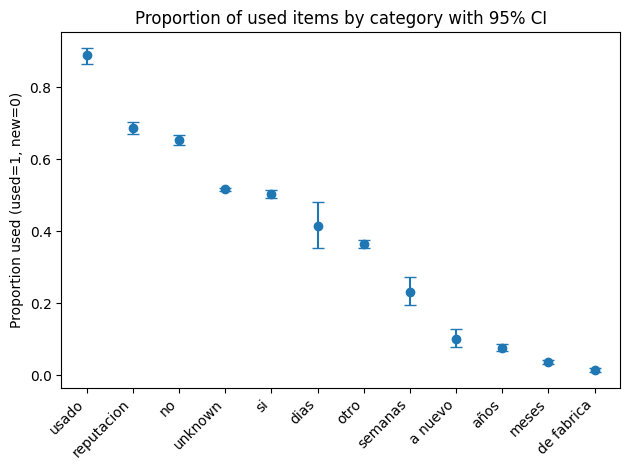

In [354]:
plot_column_analysis(res)

Looks like there are a lot of categories that are actually good at predicting the condition of the product

In [356]:
likely_to_be_used_by_warranty = look_for_likely_to_be_used(res, threshold=0.8)
likely_to_be_new_by_warranty = look_for_likely_to_be_new(res, threshold=0.2)
print("The categories that are likely to be used are:")
print(likely_to_be_used_by_warranty.index)
print("The categories that are likely to be new are:")
print(likely_to_be_new_by_warranty.index)



The categories that are likely to be used are:
Index(['usado'], dtype='object', name='processed_warranty')
The categories that are likely to be new are:
Index(['a nuevo', 'años', 'meses', 'de fabrica'], dtype='object', name='processed_warranty')


For the training dataset, we will only have the `processed_warranty` feature

In [42]:
X_dataframe.drop(columns=["warranty"], inplace=True)
X_dataframe.head()

,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,variations,listing_type_id,price,attributes,buying_mode,...,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,seller_address_state,seller_address_city,popular_seller,processed_warranty
0,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,80.0,[],buy_it_now,...,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,Capital Federal,other,False,unknown
1,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,2650.0,[],buy_it_now,...,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,Capital Federal,other,False,otro
2,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,60.0,[],buy_it_now,...,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,Capital Federal,other,False,unknown
3,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,580.0,[],buy_it_now,...,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,Capital Federal,other,False,unknown
4,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,30.0,[],buy_it_now,...,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,Buenos Aires,other,False,otro


### Sub status

In [43]:
X_dataframe["sub_status"].value_counts()

sub_status
[]             89109
[suspended]      871
[expired]         13
[deleted]          7
Name: count, dtype: int64

99% of the data is empty, so it doesn't make sense to add this feature to the training dataset

In [44]:
X_dataframe.drop(columns=["sub_status"], inplace=True)
X_dataframe.head()


,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,variations,listing_type_id,price,attributes,buying_mode,tags,...,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,seller_address_state,seller_address_city,popular_seller,processed_warranty
0,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],...,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,Capital Federal,other,False,unknown
1,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,2650.0,[],buy_it_now,[],...,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,Capital Federal,other,False,otro
2,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],...,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,Capital Federal,other,False,unknown
3,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,580.0,[],buy_it_now,[],...,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,Capital Federal,other,False,unknown
4,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],...,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,Buenos Aires,other,False,otro


### Deal IDs

In [45]:
X_dataframe["deal_ids"].value_counts()

deal_ids
[]         89783
[MOSH6]       52
[WGPLA]       36
[ABQ1I]       27
[15H9O]       26
[LZFND]       22
[JXLIQ]        6
[MISCR]        6
[CHMGI]        6
[R99GD]        5
[AZEBL]        3
[GRMWV]        2
[GAC6A]        2
[UUINF]        2
[ZZMKC]        2
[UKXWI]        2
[UQU1U]        2
[VYYJI]        2
[BBLRY]        2
[W40QU]        1
[QXDHA]        1
[F9G6U]        1
[SI7I0]        1
[YOLH8]        1
[805OS]        1
[ZZHBN]        1
[Y3MPW]        1
[7FOQD]        1
[WO4YE]        1
[PPW2S]        1
[CULNX]        1
Name: count, dtype: int64

99% of the data is empty, so it doesn't make sense to add this feature to the training dataset

In [46]:
X_dataframe.drop(columns=["deal_ids"], inplace=True)
X_dataframe.head()

,base_price,shipping,non_mercado_pago_payment_methods,variations,listing_type_id,price,attributes,buying_mode,tags,parent_item_id,...,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,seller_address_state,seller_address_city,popular_seller,processed_warranty
0,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,...,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,Capital Federal,other,False,unknown
1,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,2650.0,[],buy_it_now,[],MLA7727150374,...,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,Capital Federal,other,False,otro
2,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,...,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,Capital Federal,other,False,unknown
3,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],silver,580.0,[],buy_it_now,[],None,...,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,Capital Federal,other,False,unknown
4,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",[],bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,...,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,Buenos Aires,other,False,otro


### Shipping

In [47]:
X_dataframe["shipping"].describe()

count                                                 90000
unique                                                   39
top       {'local_pick_up': True, 'methods': [], 'tags':...
freq                                                  37292
Name: shipping, dtype: object

In [48]:
X_dataframe["shipping"].isna().sum()

np.int64(0)

In [49]:
X_dataframe["shipping"].iloc[0]

{'local_pick_up': True,
 'methods': [],
 'tags': [],
 'free_shipping': False,
 'mode': 'not_specified',
 'dimensions': None}

#### Dimensions

In [50]:
X_dataframe["shipping"].apply(lambda x: x["dimensions"]).value_counts()

shipping
33x20x12,300     4
30x30x30,650     3
33x20x12,80      2
33x20x12,400     2
33x20x12,1000    2
33x20x12,100     2
5x25x25,150      1
33x20x12,500     1
10x10x20,700     1
10x20x20,350     1
5x20x30,650      1
33x20x12,800     1
15x30x45,650     1
Name: count, dtype: int64

In [51]:
X_dataframe["shipping"].apply(lambda x: x["dimensions"]).isnull().sum()

np.int64(89978)

99% of the information in the dimensions is null

#### Local Pickup

In [52]:
X_dataframe["shipping_local_pick_up"] = X_dataframe["shipping"].apply(lambda x: x["local_pick_up"])
print(X_dataframe["shipping_local_pick_up"].count())
X_dataframe["shipping_local_pick_up"].value_counts()

90000


shipping_local_pick_up
True     71577
False    18423
Name: count, dtype: int64

In [53]:
res = column_analysis("shipping_local_pick_up", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_local_pick_up,,,,
False,18423,0.503990,0.496769,0.511210
True,71577,0.452142,0.448496,0.455789


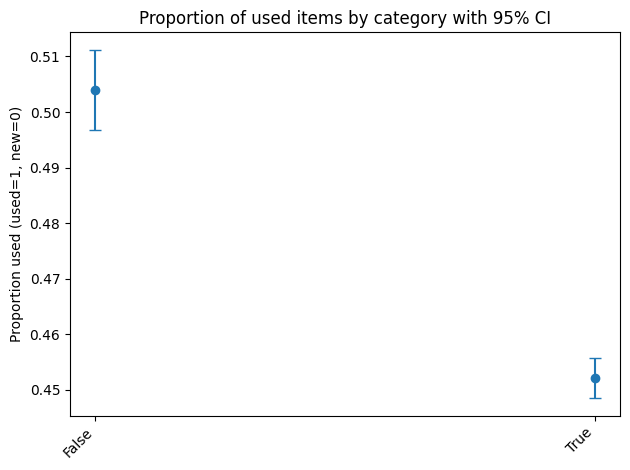

In [54]:
plot_column_analysis(res)

There's a difference in distribution of the condition, conditioned if there's local pickup or not. 
Slightly more chance to be new if there's local pickup

In [ ]:
X_dataframe.loc[X_dataframe["shipping_local_pick_up"] == True][""]

#### Free Shipping

In [55]:
X_dataframe["shipping_free_shipping"] = X_dataframe["shipping"].apply(lambda x: x["free_shipping"])
X_dataframe["shipping_free_shipping"].value_counts()

shipping_free_shipping
False    87303
True      2697
Name: count, dtype: int64

In [56]:
res = column_analysis("shipping_free_shipping", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_free_shipping,,,,
False,87303,0.474806,0.471494,0.478119
True,2697,0.072673,0.062874,0.082473


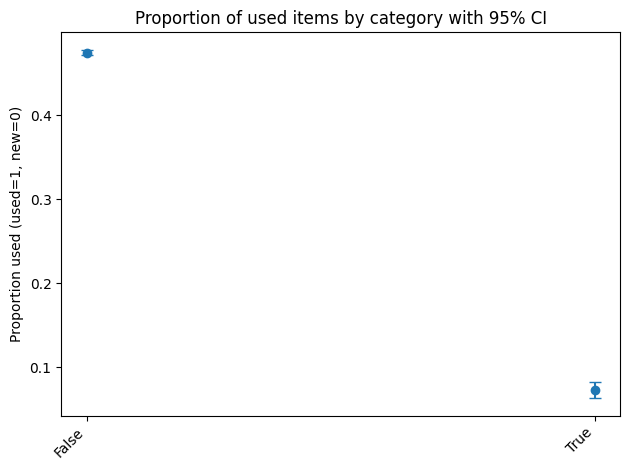

In [57]:
plot_column_analysis(res)

If the shipping is free, it's very likely to be new. If not, there's a ~50/50 chance

#### Methods

In [58]:
def check_methods(value: dict):
    if "methods" in value.keys():
        return value["methods"]
    elif "free_methods" in value.keys():
        return value["free_methods"]
    else:
        return None


# %%
X_dataframe["shipping"].apply(check_methods).value_counts()

shipping
[]                                                                                                                                  87310
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73328}]                                                                     2641
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73330}]                                                                       37
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501145}]                                                                       6
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501146}]                                                                       4
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73328}, {'rule': {'value': None, 'free_mode': 'country'}, 'id': 73330}]        1
Name: count, dtype: int64

Seems like we have two possible methods: unknown and different IDs for free mode

In [59]:
X_dataframe["shipping_method"] = X_dataframe["shipping"].apply(check_methods).apply(
    lambda x: "free_mode" if isinstance(x, list) and len(x) > 0 else "unknown"
)
X_dataframe["shipping_method"].value_counts()

shipping_method
unknown      87311
free_mode     2689
Name: count, dtype: int64

In [60]:
res = column_analysis("shipping_method", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_method,,,,
unknown,87311,0.474774,0.471462,0.478086
free_mode,2689,0.072518,0.062713,0.082322


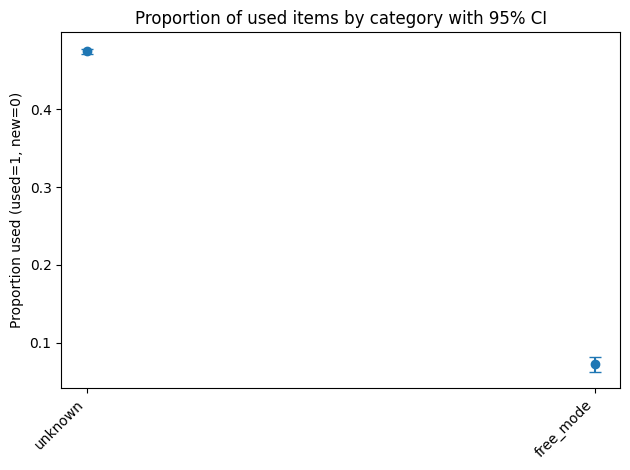

In [61]:
plot_column_analysis(res)

If the shipping has a "free_mode" method is more likely to be new

#### Tags

In [62]:
X_dataframe["shipping"].apply(lambda x: x["tags"]).value_counts()

shipping
[]                               89941
[relisted_with_modifications]       50
[free_method_upgraded]               9
Name: count, dtype: int64

More than 99% has no tags. It doesn't make sense to add this feature to the training dataset

#### Mode

In [63]:
X_dataframe["shipping"].apply(lambda x: x["mode"]).value_counts()

shipping
me2              46059
not_specified    40725
custom            3130
me1                 86
Name: count, dtype: int64

In [64]:
X_dataframe["shipping_mode"] = X_dataframe["shipping"].apply(lambda x: x["mode"])
res = column_analysis("shipping_mode", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_mode,,,,
not_specified,40725,0.511799,0.506944,0.516654
me2,46059,0.429493,0.424972,0.434013
custom,3130,0.326837,0.310402,0.343272
me1,86,0.000000,0.000000,0.000000


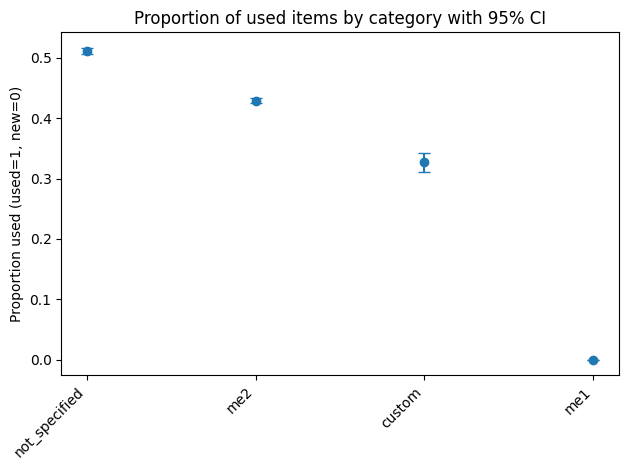

In [65]:
plot_column_analysis(res)

Each of the shipping modes have different condition distribution, and even me1 p is almost 1

In [66]:
X_dataframe.drop(columns=["shipping"], inplace=True)
X_dataframe.head()

,base_price,non_mercado_pago_payment_methods,variations,listing_type_id,price,attributes,buying_mode,tags,parent_item_id,category_id,...,available_quantity,used,seller_address_state,seller_address_city,popular_seller,processed_warranty,shipping_local_pick_up,shipping_free_shipping,shipping_method,shipping_mode
0,80.0,"[{'description': 'Transferencia bancaria', 'id...",[],bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,MLA126406,...,1,0,Capital Federal,other,False,unknown,True,False,unknown,not_specified
1,2650.0,"[{'description': 'Transferencia bancaria', 'id...",[],silver,2650.0,[],buy_it_now,[],MLA7727150374,MLA10267,...,1,1,Capital Federal,other,False,otro,True,False,unknown,me2
2,60.0,"[{'description': 'Transferencia bancaria', 'id...",[],bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,MLA1227,...,1,1,Capital Federal,other,False,unknown,True,False,unknown,me2
3,580.0,"[{'description': 'Transferencia bancaria', 'id...",[],silver,580.0,[],buy_it_now,[],None,MLA86345,...,1,0,Capital Federal,other,False,unknown,True,False,unknown,me2
4,30.0,"[{'description': 'Transferencia bancaria', 'id...",[],bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,MLA41287,...,1,1,Buenos Aires,other,False,otro,True,False,unknown,not_specified


### Non-mercadopago Payment Methods

In [186]:
X_dataframe["non_mercado_pago_payment_methods"].describe()

count     90000
unique      174
top          []
freq      27531
Name: non_mercado_pago_payment_methods, dtype: object

In [187]:
X_dataframe["non_mercado_pago_payment_methods"].value_counts()

non_mercado_pago_payment_methods
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        27531
[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]                                                                                                                                       

In [188]:
X_dataframe["non_mercado_pago_payment_methods"].isna().sum()


np.int64(0)

In [189]:
all_methods = [
    m["description"]
    for methods in X_dataframe["non_mercado_pago_payment_methods"]
    if methods
    for m in methods
]
all_methods = list(set(all_methods))
all_methods

['Contra reembolso',
 'Visa Electron',
 'Mastercard Maestro',
 'Visa',
 'Diners',
 'MasterCard',
 'Transferencia bancaria',
 'American Express',
 'MercadoPago',
 'Cheque certificado',
 'Acordar con el comprador',
 'Giro postal',
 'Efectivo',
 'Tarjeta de crédito']

#### Tarjetas

In [190]:
tarjetas = [
    "Tarjeta de crédito",
    "Visa Electron",
    "Mastercard Maestro",
    "American Express",
    "Mastercard",
    "Diners",
    "Visa",
]

X_dataframe["tarjeta"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] in tarjetas for m in x))
X_dataframe["tarjeta"].value_counts()

tarjeta
False    67240
True     22760
Name: count, dtype: int64

In [191]:
res = column_analysis("tarjeta", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
tarjeta,,,,
False,67240,0.519795,0.516017,0.523570
True,22760,0.294244,0.288359,0.300199


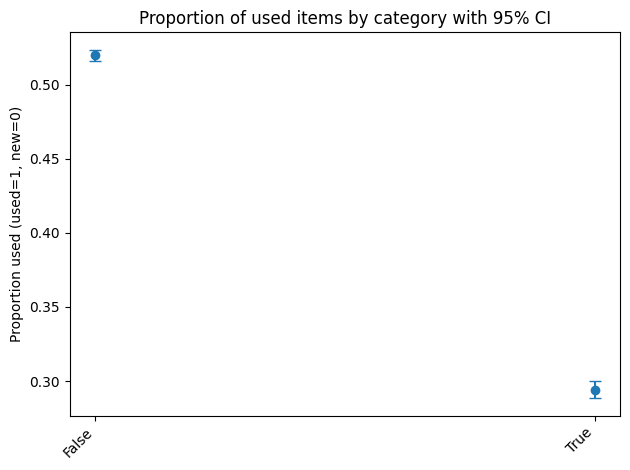

In [192]:
plot_column_analysis(res)

There's a difference in distribution depending if it accepts cards or not

#### Efectivo

In [193]:
X_dataframe["efectivo"]=X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Efectivo" for m in x))
X_dataframe["efectivo"].value_counts()

efectivo
True     60350
False    29650
Name: count, dtype: int64

In [194]:
res = column_analysis("efectivo", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
efectivo,,,,
False,29650,0.499764,0.494073,0.505455
True,60350,0.444573,0.440612,0.448541


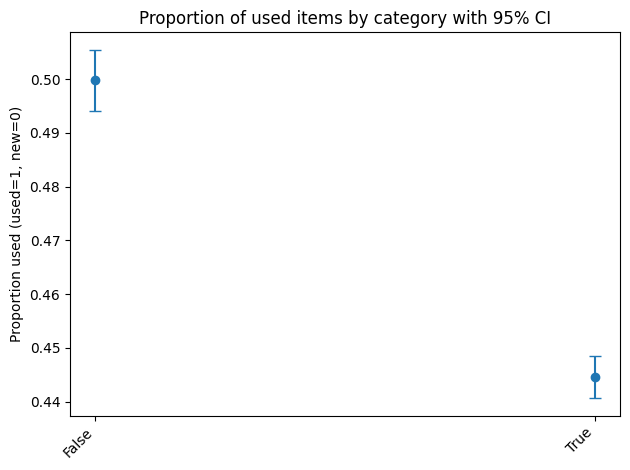

In [195]:
plot_column_analysis(res)

Very slight difference in distribution of "Efectivo" true or false

#### Mercadopago

In [196]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "MercadoPago" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89354
True       646
Name: count, dtype: int64

In [197]:
# Check if when there's MercadoPago in the description, the `accepts_mercadopago` is True
mp_index = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "MercadoPago" for m in x))
X_dataframe.loc[mp_index, "accepts_mercadopago"].value_counts()

KeyError: 'accepts_mercadopago'

99% of the values non_mercado_pago_payment_methods are False for "mercadopago". Doesn't add information

#### Contra reembolso

In [ ]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Contra reembolso" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89430
True       570
Name: count, dtype: int64

99% of the "contra-reembolso" are False. Doesn't add information by itself

#### Cheque certificado

In [ ]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Cheque certificado" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    89588
True       412
Name: count, dtype: int64

99% of the "cheque certificado" are False. Doesn't add information by itself

#### Giro postal

In [ ]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Giro postal" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    88511
True      1489
Name: count, dtype: int64

98% of the "giro postal" values are False. Doesn't add information by itself

#### Transferencia Bancaria

In [ ]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Transferencia bancaria" for m in x)).value_counts()

non_mercado_pago_payment_methods
True     46300
False    43700
Name: count, dtype: int64

In [ ]:
X_dataframe["transferencia_bancaria"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Transferencia bancaria" for m in x))
res = column_analysis("transferencia_bancaria", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
transferencia_bancaria,,,,
False,43700,0.542494,0.537823,0.547165
True,46300,0.387495,0.383057,0.391932


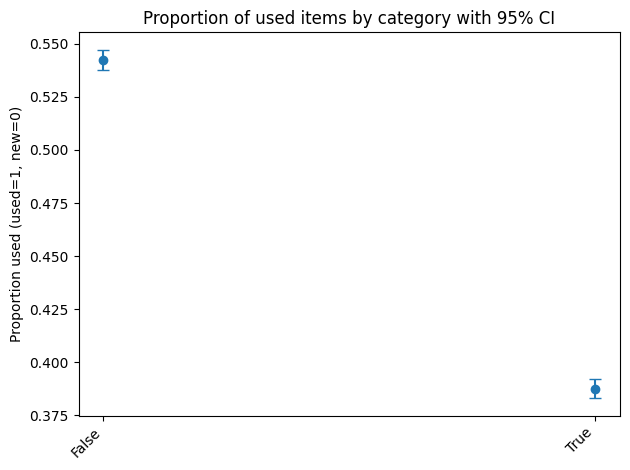

In [ ]:
plot_column_analysis(res)

Slightly different distribution conditioned on if it accepts "transferencia bancaria" or not

#### Acordar con el comprador

In [ ]:
X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Acordar con el comprador" for m in x)).value_counts()

non_mercado_pago_payment_methods
False    82825
True      7175
Name: count, dtype: int64

In [ ]:
X_dataframe["acordar_comprador"] = X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: any(m["description"] == "Acordar con el comprador" for m in x))
res = column_analysis("acordar_comprador", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
acordar_comprador,,,,
True,7175,0.547735,0.536218,0.559253
False,82825,0.455394,0.452002,0.458786


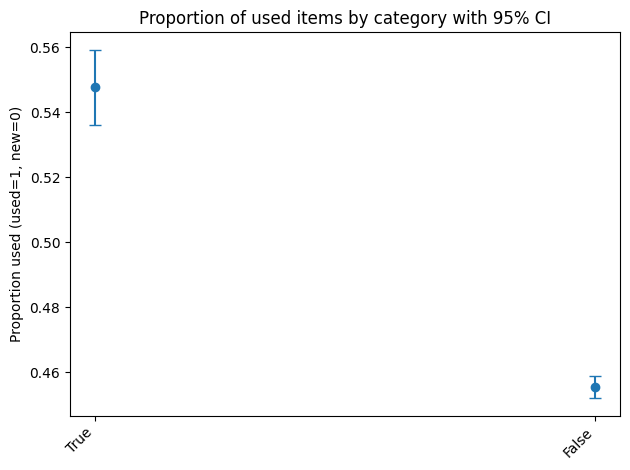

In [ ]:
plot_column_analysis(res)

Slightly different distribution conditioned on if it accepts "transferencia bancaria" or not

#### Number of payment methods

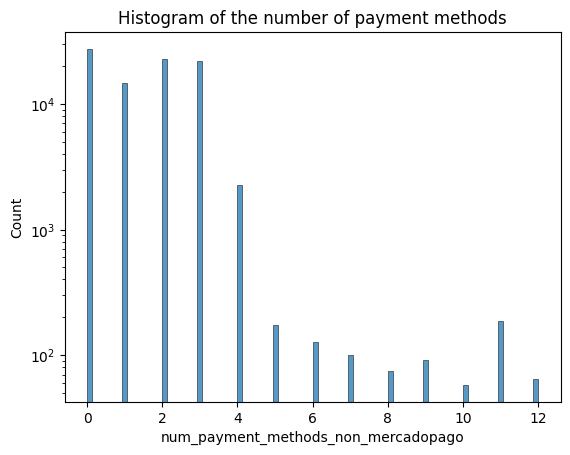

In [208]:
X_dataframe["num_payment_methods_non_mercadopago"]=X_dataframe["non_mercado_pago_payment_methods"].apply(lambda x: len(x))
# Histogram of the number of payment methods
sns.histplot(X_dataframe["num_payment_methods_non_mercadopago"])
plt.title("Histogram of the number of payment methods")
plt.yscale("log")
plt.show()


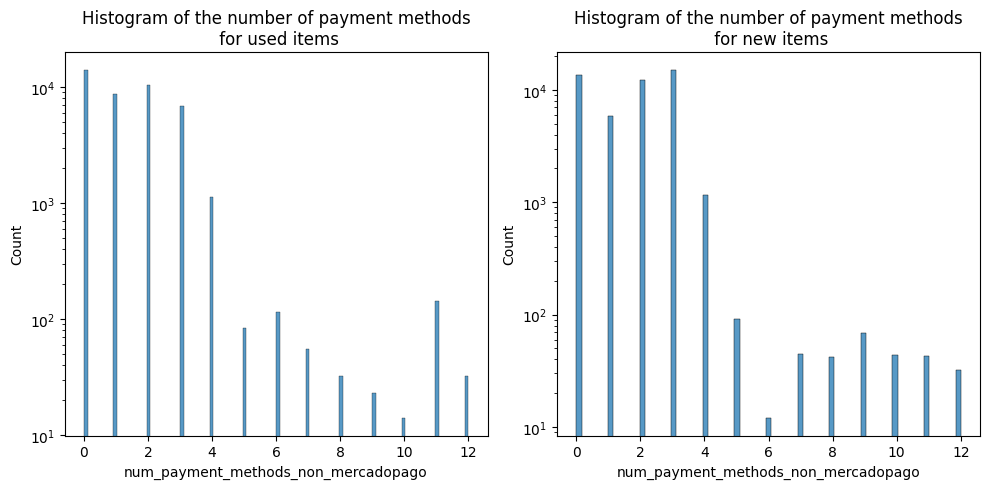

In [213]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"], ax=ax[0])
ax[0].set_title("Histogram of the number of payment methods\n for used items")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["num_payment_methods_non_mercadopago"], ax=ax[1])
ax[1].set_title("Histogram of the number of payment methods\n for new items")
ax[1].set_yscale("log")
ax[0].set_yscale("log")
plt.tight_layout()
plt.show()  

In [201]:
pearson_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "num_payment_methods_non_mercadopago"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("--------------------------------")
print("Spearman correlation: ", spearman_corr)
print("--------------------------------")
print("Kendall correlation: ", kendall_corr)
print("--------------------------------")


Pearson correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non_mercadopago -0.114886   

                                     num_payment_methods_non_mercadopago  
used                                                           -0.114886  
num_payment_methods_non_mercadopago                             1.000000  
--------------------------------
Spearman correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non_mercadopago -0.140328   

                                     num_payment_methods_non_mercadopago  
used                                                           -0.140328  
num_payment_methods_non_mercadopago                             1.000000  
--------------------------------
Kendall correlation:                                           used  \
used                                 1.000000   
num_payment_methods_non

In [204]:
X_dataframe["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
0     27531
2     22688
3     22030
1     14594
4      2282
11      187
5       175
6       126
7       100
9        91
8        74
12       64
10       58
Name: count, dtype: int64

In [211]:
X_dataframe.loc[X_dataframe["num_payment_methods_non_mercadopago"] > 4].loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
11    144
6     114
5      84
7      55
12     32
8      32
9      23
10     14
Name: count, dtype: int64

In [212]:
X_dataframe.loc[X_dataframe["num_payment_methods_non_mercadopago"] > 4].loc[
    X_dataframe["used"] == 0
]["num_payment_methods_non_mercadopago"].value_counts()

num_payment_methods_non_mercadopago
5     91
9     68
7     45
10    44
11    43
8     42
12    32
6     12
Name: count, dtype: int64

In [215]:
X_dataframe["num_payment_methods_non_mercadopago"].apply(lambda x: 4 if x > 4 else x).value_counts()

num_payment_methods_non_mercadopago
0    27531
2    22688
3    22030
1    14594
4     3157
Name: count, dtype: int64

In [218]:
X_dataframe.loc[X_dataframe["used"] == 0]["num_payment_methods_non_mercadopago"].apply(
    lambda x: 3 if x > 3 else x
).value_counts()

num_payment_methods_non_mercadopago
3    16685
0    13446
2    12337
1     5884
Name: count, dtype: int64

In [219]:
X_dataframe.loc[X_dataframe["used"] == 1]["num_payment_methods_non_mercadopago"].apply(
    lambda x: 3 if x > 3 else x
).value_counts()

num_payment_methods_non_mercadopago
0    14085
2    10351
1     8710
3     8502
Name: count, dtype: int64

There's a slight different distribution if it's new, there's more concentration in more payment methods 

In [ ]:
X_dataframe.drop(columns=["non_mercado_pago_payment_methods"], inplace=True)
X_dataframe.head()


,base_price,variations,listing_type_id,price,attributes,buying_mode,tags,parent_item_id,category_id,descriptions,...,processed_warranty,shipping_local_pick_up,shipping_free_shipping,shipping_method,shipping_mode,tarjeta,efectivo,transferencia_bancaria,acordar_comprador,num_payment_methods_non_mercadopago
0,80.0,[],bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,MLA126406,[{'id': 'MLA4695330653-912855983'}],...,unknown,True,False,unknown,not_specified,False,True,True,True,3
1,2650.0,[],silver,2650.0,[],buy_it_now,[],MLA7727150374,MLA10267,[{'id': 'MLA7160447179-930764806'}],...,otro,True,False,unknown,me2,False,True,True,False,2
2,60.0,[],bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,MLA1227,[{'id': 'MLA7367189936-916478256'}],...,unknown,True,False,unknown,me2,True,True,True,False,3
3,580.0,[],silver,580.0,[],buy_it_now,[],None,MLA86345,[{'id': 'MLA9191625553-932309698'}],...,unknown,True,False,unknown,me2,True,True,True,False,3
4,30.0,[],bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,MLA41287,[{'id': 'MLA7787961817-902981678'}],...,otro,True,False,unknown,not_specified,False,True,True,True,3


### Variations

In [90]:
X_dataframe["variations"].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [220]:
X_dataframe["variations"].value_counts()

variations
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [92]:
X_dataframe["variations"].apply(lambda x: len(x["attribute_combinations"]) > 0).value_counts()

variations
False    82626
True      7374
Name: count, dtype: int64

In [93]:
X_dataframe["variations"] = X_dataframe["variations"].apply(lambda x: len(x) > 0)
res = column_analysis("variations", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
variations,,,,
False,82626,0.466124,0.462723,0.469526
True,7374,0.425007,0.413723,0.436291


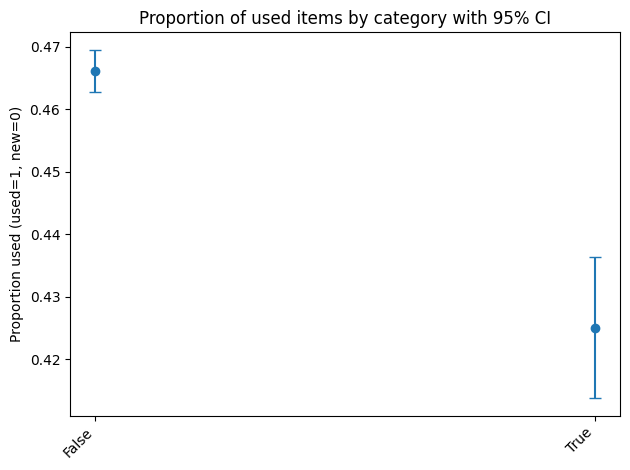

In [94]:
plot_column_analysis(res)

### Listing Type ID

In [95]:
X_dataframe["listing_type_id"].value_counts()

listing_type_id
bronze          56904
free            19260
silver           8195
gold_special     2693
gold             2170
gold_premium      765
gold_pro           13
Name: count, dtype: int64

In [96]:
X_dataframe["listing_type_id"].isnull().sum()

np.int64(0)

In [97]:
res = column_analysis("listing_type_id", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
listing_type_id,,,,
free,19260,0.925857,0.922156,0.929557
gold_premium,765,0.456209,0.420890,0.491528
bronze,56904,0.377724,0.373740,0.381707
silver,8195,0.197682,0.189058,0.206305
gold,2170,0.138710,0.124163,0.153256
gold_special,2693,0.019309,0.014111,0.024508
gold_pro,13,0.000000,0.000000,0.000000


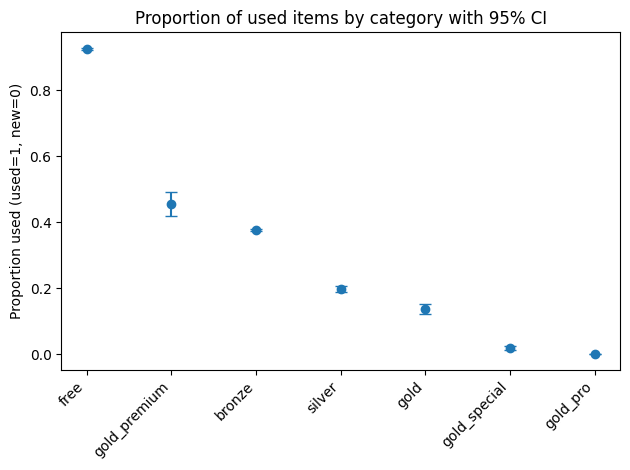

In [98]:
plot_column_analysis(res)

The listing type IDs have different distribution for the condition

### Attributes

In [99]:
X_dataframe["attributes"].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [100]:
X_dataframe["attributes"].value_counts()

attributes
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [101]:
attributes_names = [
    m["name"]
    for methods in X_dataframe["attributes"]
    if methods
    for m in methods
]
attributes_names = list(set(attributes_names))
attributes_names

['Hasta (Fecha)',
 'Superficie construible',
 'Número de camas',
 'Sala de reuniones',
 'Faros antinieblas traseros',
 'DVD',
 '% de seña',
 'Asiento acompañante regulable en altura',
 'Cancha de futbol',
 'Video',
 'Isofix',
 'Levantavidrios eléctricos delanteros',
 'Butaca conductor eléctrica',
 'Alarma de seguridad',
 'Control de tracción',
 'Tanque de incendio',
 'Sistema de frenado',
 'Limpia/lava luneta',
 'Baños',
 'Superficie construida (m²)',
 'Tapizado de cuero',
 'Jardín',
 'Antigüedad del casco',
 'Tipo de inmueble',
 'Tipo',
 'Frenos ABS',
 'Llantas de aleación',
 'Tipo de habitación',
 'Altura',
 'Transmisión',
 'Blindado',
 'Carrocería',
 'Hasta',
 'Depósito',
 'Teléfono',
 'Corrales',
 'TV por cable',
 'Agua Corriente',
 'Tracción',
 'Entrada USB',
 'CD',
 'Luz a motor',
 'Sensor de lluvia',
 'Cant. de puertas',
 'Medida del neumático',
 'Baulera',
 'Ambientes',
 'Estar',
 'Check In',
 'Vidrios polarizados',
 'Fuerza motriz',
 'Hectáreas totales',
 'Sistema contra incen

In [102]:
len(attributes_names)

300

In [103]:
X_dataframe["attributes"].apply(lambda x: len(x)).value_counts()

attributes
0     78850
2      7651
1      1366
65      783
14      161
3       141
50      101
6        99
52       99
13       93
9        57
78       55
77       47
7        41
41       35
42       33
23       31
8        30
29       29
47       29
38       23
4        20
63       19
15       18
27       18
16       16
39       14
10       13
40       13
75       11
17        9
73        8
22        8
12        8
81        7
48        7
18        5
5         5
20        5
11        4
31        4
64        4
36        4
66        4
54        3
26        3
37        3
19        3
24        2
21        2
46        2
71        2
45        1
67        1
Name: count, dtype: int64

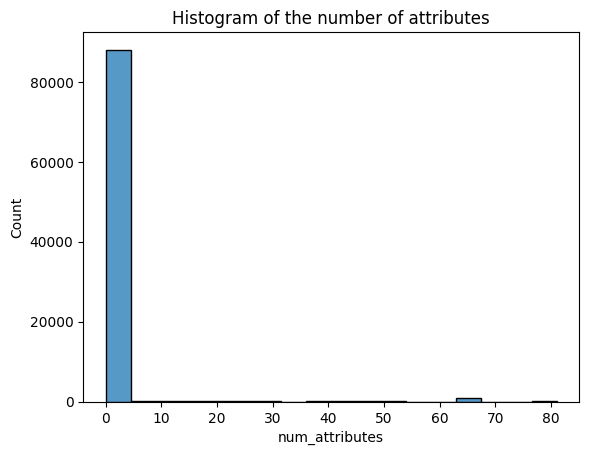

In [104]:
X_dataframe["num_attributes"] = X_dataframe[
    "attributes"
].apply(lambda x: len(x))
# Histogram of the number of attributes
sns.histplot(X_dataframe["num_attributes"])
plt.title("Histogram of the number of attributes")
plt.show()

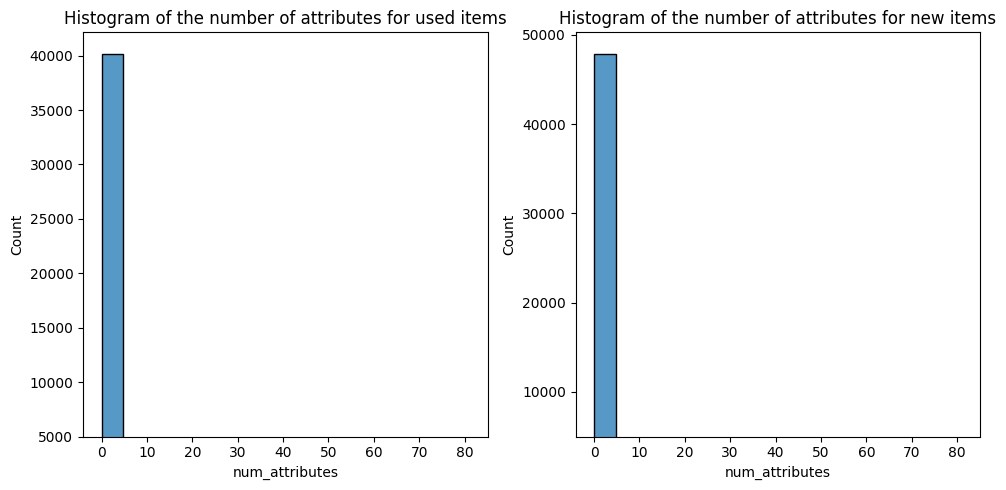

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))   

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["num_attributes"], ax=ax[0])
ax[0].set_title("Histogram of the number of attributes for used items")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["num_attributes"], ax=ax[1])
ax[1].set_title("Histogram of the number of attributes for new items")
ax[0].set_ylim(5000)
ax[1].set_ylim(5000)
plt.tight_layout()
plt.show()


The amount of attributes is not a good predictor of the condition of the item

### Price

In [302]:
from argendolar import Argendolar, TipoDivisas

argendolar = Argendolar()
dolar_oficial = argendolar.get_dolar_historia_completa(tipo=TipoDivisas.OFICIAL)

def transform_into_USD(price: float, currency_id: str, last_updated: str):
    if currency_id == "USD":
        return price
    else:
        # ensure last_updated is string YYYY-MM-DD
        if hasattr(last_updated, "strftime"):
            date_str = last_updated.strftime("%Y-%m-%d")
        else:
            date_str = str(last_updated)[:10]

        # get dolar value
        dolar_row = dolar_oficial.loc[dolar_oficial["fecha"] == date_str, "compra"]
        if dolar_row.empty:
            return None  # or np.nan
        dolar_price = dolar_row.iloc[0]
        return price/ dolar_price

OSError: Could not find a suitable TLS CA certificate bundle, invalid path: /Users/catalinatrujillo/Downloads/MELI_Challenge/.venv/lib/python3.10/site-packages/certifi/cacert.pem

In [110]:
X_dataframe["price_usd"] = X_dataframe.apply(
    lambda row: transform_into_USD(
        row["price"], row["currency_id"], row["last_updated"]
    ),
    axis=1,
)
X_dataframe["price_usd"].describe()

count    9.000000e+04
mean     7.538294e+03
std      1.011185e+06
min      9.333333e-02
25%      1.000000e+01
50%      2.777778e+01
75%      8.888889e+01
max      2.469136e+08
Name: price_usd, dtype: float64

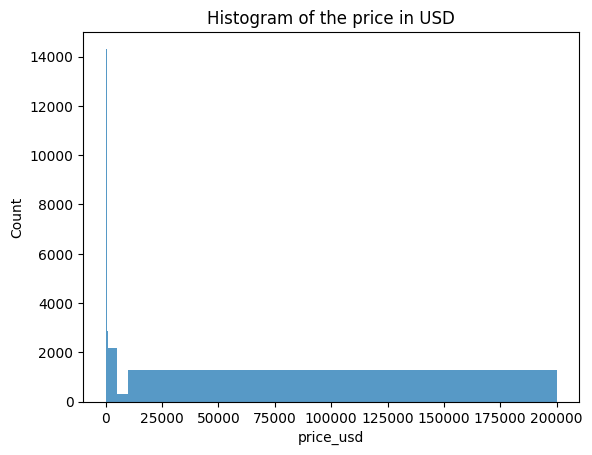

In [113]:
sns.histplot(X_dataframe["price_usd"], bins = [0, 5, 10, 50, 100, 500, 1000, 5000, 10000, 200000])
plt.ylim(0, 15000)
plt.title("Histogram of the price in USD")
plt.show()


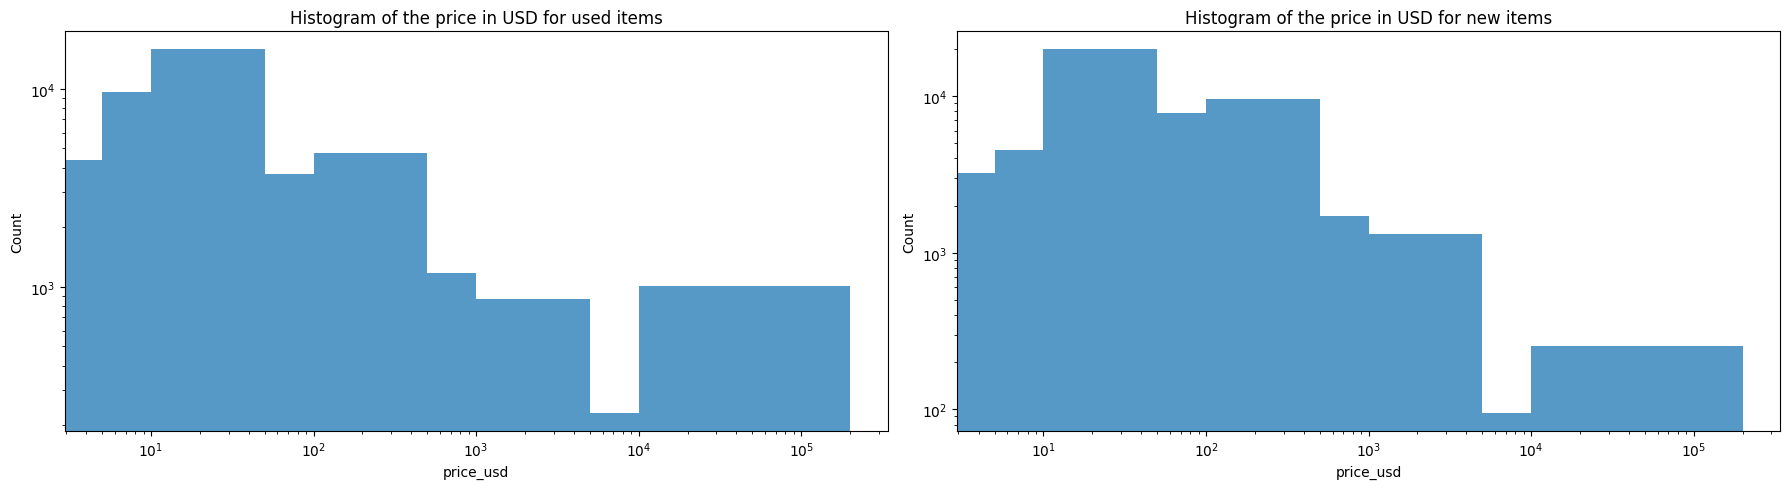

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["price_usd"],
    ax=ax[0],
    bins=[0, 5, 10, 50, 100, 500, 1000, 5000, 10000, 200000],
)
ax[0].set_title("Histogram of the price in USD for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["price_usd"], ax=ax[1], bins = [0, 5, 10, 50, 100, 500, 1000, 5000, 10000, 200000])
ax[1].set_title("Histogram of the price in USD for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()

In [289]:
X_dataframe["price_usd"].apply(lambda x: np.log1p(x)).describe()

KeyError: 'price_usd'

In [121]:
pearson_corr = X_dataframe[["used", "price_usd"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "price_usd"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "price_usd"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                 used  price_usd
used       1.000000   0.001271
price_usd  0.001271   1.000000
Spearman correlation:                 used  price_usd
used       1.000000  -0.202263
price_usd -0.202263   1.000000
Kendall correlation:                 used  price_usd
used       1.000000  -0.165745
price_usd -0.165745   1.000000


The spearman and the keandall correlation show a relationship in that shows, slightly, that the newer the item, the higher the price.

However, in the histogram the used items seems to have more concentration in the high prices than the new ones

### Buying mode

In [124]:
X_dataframe["buying_mode"].value_counts()

buying_mode
buy_it_now    87311
classified     1982
auction         707
Name: count, dtype: int64

In [125]:
res = column_analysis("buying_mode", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
buying_mode,,,,
classified,1982,0.770434,0.751914,0.788954
auction,707,0.677511,0.643030,0.711991
buy_it_now,87311,0.454032,0.450730,0.457335


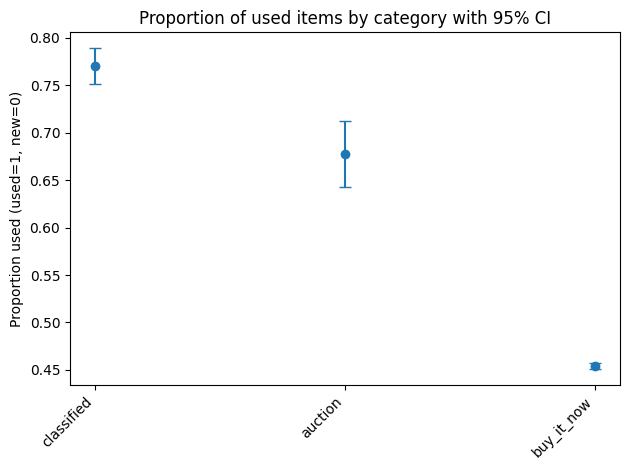

In [126]:
plot_column_analysis(res)


There's different distribution depending the buying mode

### Tags

In [141]:
X_dataframe["tags"].describe()


count                         90000
unique                            8
top       [dragged_bids_and_visits]
freq                          65315
Name: tags, dtype: object

In [128]:
X_dataframe["tags"].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

In [143]:
possible_tags = list(X_dataframe["tags"].value_counts().index)
all_tags = []
for tag in possible_tags:
    all_tags.extend(tag)
possible_tags = list(set(all_tags))
possible_tags


['dragged_bids_and_visits',
 'poor_quality_thumbnail',
 'free_relist',
 'dragged_visits',
 'good_quality_thumbnail']

#### Empty tags

In [144]:
X_dataframe["empty_tags"] = X_dataframe["tags"].apply(lambda x: len(x) == 0)
X_dataframe["empty_tags"].value_counts()

empty_tags
False    67588
True     22412
Name: count, dtype: int64

In [145]:
res = column_analysis("empty_tags", X_dataframe)
display(res)



,n,prop_used,ci_lower,ci_upper
empty_tags,,,,
False,67588,0.465378,0.461618,0.469139
True,22412,0.454846,0.448326,0.461365


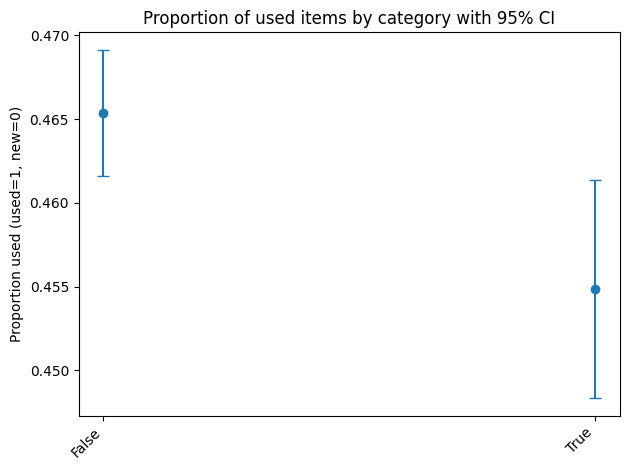

In [146]:
plot_column_analysis(res)

In [147]:
# there's no difference in distribution depending if the has empty tags or not
X_dataframe.drop(columns=["empty_tags"], inplace=True)
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,...,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,...,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,...,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,...,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,...,active,None,NaN,None,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1


#### dragged_bids_and_visits

In [155]:
X_dataframe ["tags_dragged_bids_and_visits"]=X_dataframe["tags"].apply(lambda x: "dragged_bids_and_visits" in x)

In [156]:
res = column_analysis(
    "tags_dragged_bids_and_visits",
    X_dataframe
)
res

,n,prop_used,ci_lower,ci_upper
tags_dragged_bids_and_visits,,,,
True,66516,0.463663,0.459873,0.467453
False,23484,0.460186,0.453811,0.466560


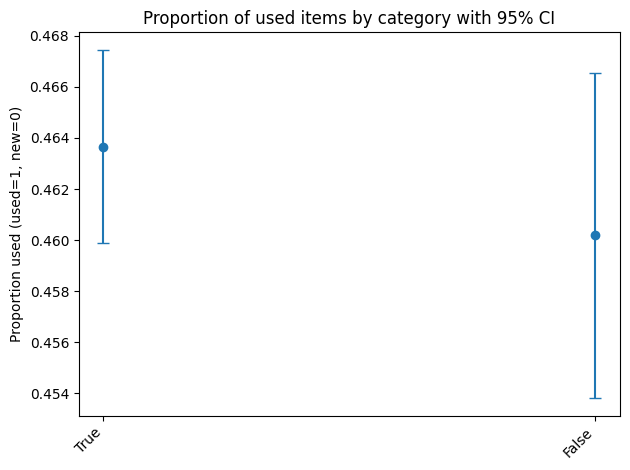

In [157]:
plot_column_analysis(res)

Not at all conclusive

#### dragged_visits

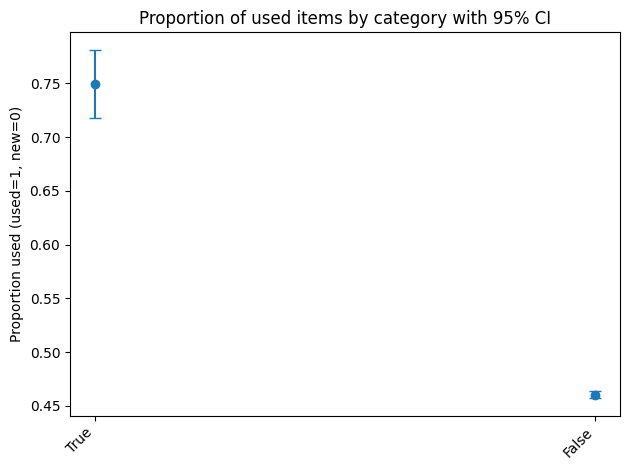

In [163]:
X_dataframe["dragged_visits"] = X_dataframe["tags"].apply(lambda x: "dragged_visits" in x)
res = column_analysis(
    "dragged_visits",
    X_dataframe
)
plot_column_analysis(res)


In [164]:
res

,n,prop_used,ci_lower,ci_upper
dragged_visits,,,,
True,723,0.749654,0.718054,0.781254
False,89277,0.460432,0.457163,0.463702


Very little amount of dragged visits

In [170]:
X_dataframe.drop(columns=["dragged_visits"], inplace=True)

#### free_relist

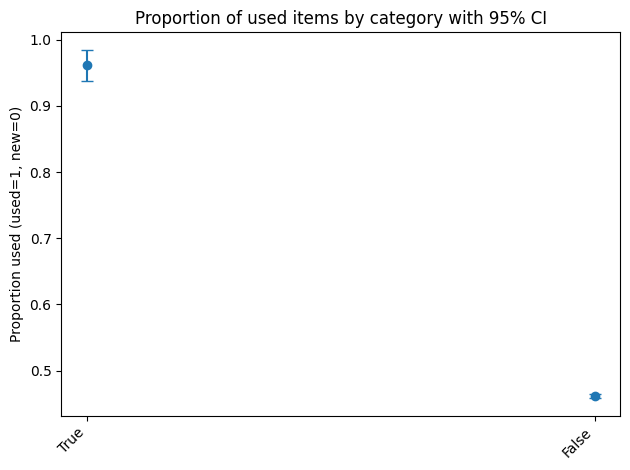

In [165]:
X_dataframe["tags_free_relist"] = X_dataframe["tags"].apply(lambda x: "free_relist" in x)
res = column_analysis(
    "tags_free_relist",
    X_dataframe
)
plot_column_analysis(res)


In [166]:
res

,n,prop_used,ci_lower,ci_upper
tags_free_relist,,,,
True,259,0.961390,0.937880,0.984900
False,89741,0.461316,0.458055,0.464578


Very little amount of free relist

In [169]:
X_dataframe.drop(columns=["tags_free_relist"], inplace=True)

#### good_quality_thumbnail

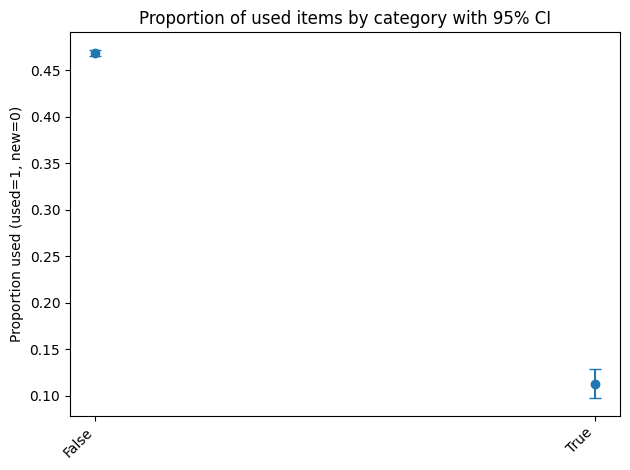

In [167]:
X_dataframe["tags_good_quality_thumbnail"] = X_dataframe["tags"].apply(lambda x: "good_quality_thumbnail" in x)
res = column_analysis(
    "tags_good_quality_thumbnail",
    X_dataframe
)
plot_column_analysis(res)


In [168]:
res

,n,prop_used,ci_lower,ci_upper
tags_good_quality_thumbnail,,,,
False,88463,0.468829,0.465540,0.472117
True,1537,0.113208,0.097362,0.129053


#### poor_quality_thumbnail

In [171]:
X_dataframe["tags"].apply(lambda x: "poor_quality_thumbnail" in x).value_counts()

tags
False    89987
True        13
Name: count, dtype: int64

Not enough poor quality thumbnail tag

### Parent item ID

In [172]:
X_dataframe["parent_item_id"].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

In [173]:
X_dataframe["parent_item_id"].value_counts()

parent_item_id
MLA6553902747    1
MLA4317323376    1
MLA3842402942    1
MLA6950118955    1
MLA2431639060    1
                ..
MLA2301627608    1
MLA5909068300    1
MLA7790783866    1
MLA4750597465    1
MLA3661010119    1
Name: count, Length: 69310, dtype: int64

In [174]:
X_dataframe["parent_item_id"].isnull().sum()

np.int64(20690)

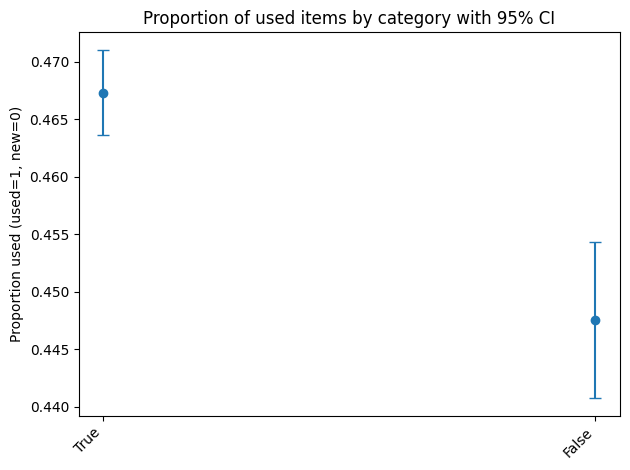

In [175]:
X_dataframe["has_parent_item_id"] = X_dataframe["parent_item_id"].notna()
res = column_analysis("has_parent_item_id", X_dataframe)
plot_column_analysis(res)


There's a slightly different distribution if the item has a parent id

### Category ID

In [195]:
X_dataframe["category_id"].describe()

count       90000
unique      10491
top       MLA1227
freq         4139
Name: category_id, dtype: object

In [196]:
X_dataframe["category_id"].value_counts()[:50]

category_id
MLA1227      4139
MLA2044      1759
MLA41287      829
MLA3530       685
MLA2038       601
MLA15171      522
MLA15328      446
MLA1383       416
MLA41269      399
MLA15204      395
MLA3361       389
MLA2032       386
MLA85960      344
MLA41064      333
MLA119287     330
MLA6651       323
MLA1963       310
MLA41185      288
MLA26536      288
MLA3936       281
MLA60611      275
MLA4335       261
MLA41174      257
MLA41260      255
MLA41083      253
MLA15226      251
MLA5496       234
MLA11456      231
MLA1207       229
MLA352293     224
MLA40497      222
MLA1914       221
MLA1902       219
MLA1635       208
MLA2039       201
MLA2042       195
MLA6009       194
MLA41173      193
MLA15197      189
MLA1474       189
MLA40507      186
MLA86029      185
MLA41112      179
MLA1468       178
MLA7251       176
MLA7373       174
MLA5500       174
MLA40547      170
MLA12812      165
MLA370638     163
Name: count, dtype: int64

In [197]:
X_dataframe["category_id"].isnull().sum()

np.int64(0)

In [198]:
popular_categories = (
    X_dataframe["category_id"].value_counts().loc[lambda x: x > 100].index
)
X_dataframe["popular_category"] = X_dataframe["category_id"].apply(
    lambda x: x in popular_categories
)
X_dataframe["popular_category"].value_counts()


popular_category
False    63769
True     26231
Name: count, dtype: int64

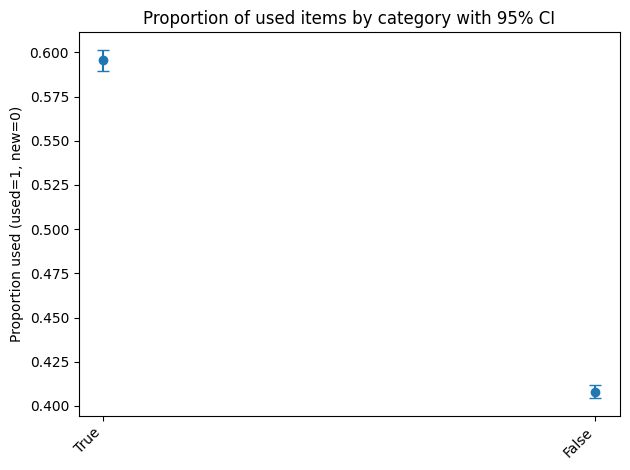

In [199]:
res = column_analysis("popular_category", X_dataframe)
plot_column_analysis(res)

Different distribution for popular categories

### Descriptions

In [ ]:
X_dataframe["descriptions"].describe()

### Last updated

In [10]:
X_dataframe["last_updated"].describe()

count                        90000
unique                       86015
top       2015-09-30T12:20:39.000Z
freq                             6
Name: last_updated, dtype: object

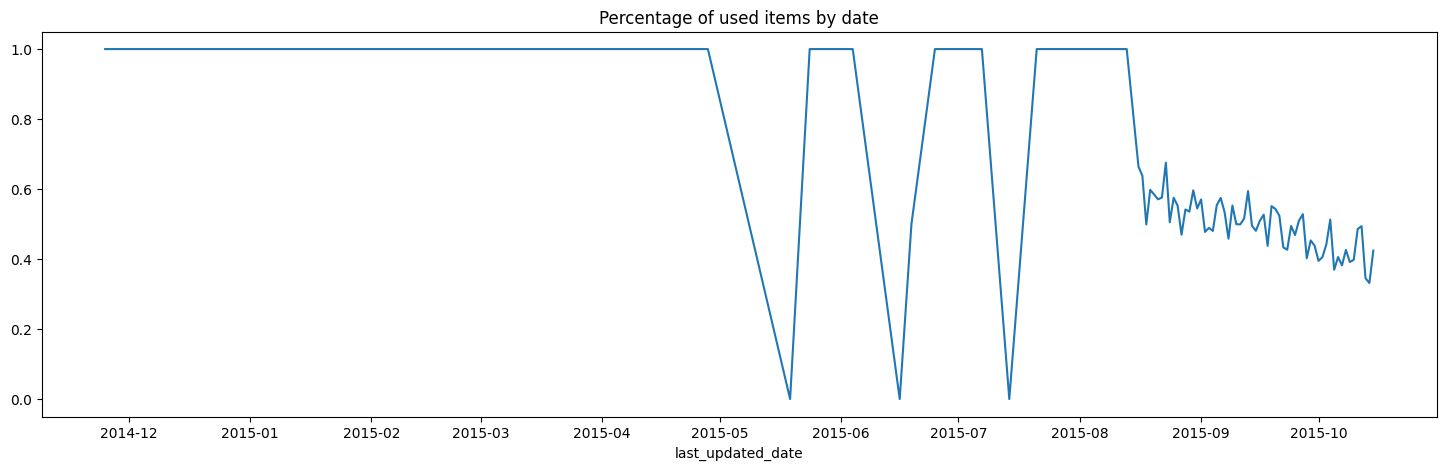

In [82]:
from datetime import date

# For each date of last updated, percentage of used items
# plot it like a time series
X_dataframe["last_updated"] = pd.to_datetime(X_dataframe["last_updated"])
X_dataframe["last_updated_date"] = X_dataframe["last_updated"].dt.date
plt.figure(figsize=(18, 5))
X_dataframe.groupby("last_updated_date")["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

In [20]:
X_dataframe.groupby("last_updated_date")["used"].count()[:32]

last_updated_date
2014-11-25      1
2014-12-09      1
2014-12-20      1
2015-01-07      1
2015-01-14      1
2015-01-18      1
2015-01-21      1
2015-01-22      1
2015-02-07      1
2015-02-18      1
2015-03-10      1
2015-03-30      1
2015-04-18      1
2015-04-21      1
2015-04-28      1
2015-05-19      1
2015-05-24      1
2015-05-28      1
2015-05-30      1
2015-06-04      2
2015-06-16      1
2015-06-19      2
2015-06-25      5
2015-07-03      1
2015-07-07      1
2015-07-14      1
2015-07-21      2
2015-08-03      1
2015-08-12      2
2015-08-13      2
2015-08-16    265
2015-08-17    594
Name: used, dtype: int64

Before August the items are only used. But there's less than 5 items updated after 2015-08-15.

There could be something about the business that explains this.

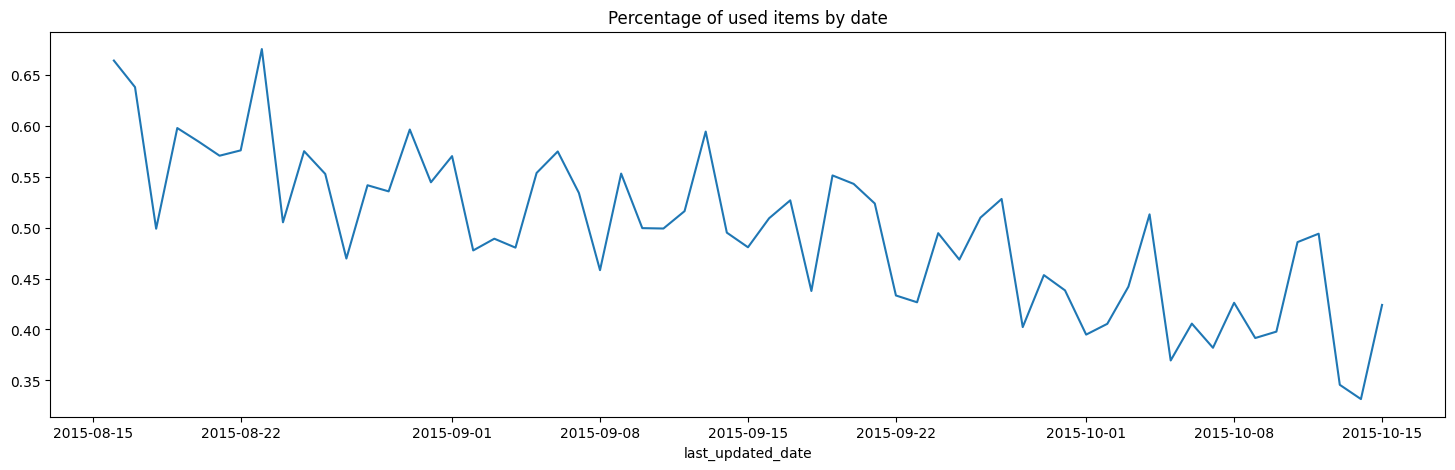

In [21]:
plt.figure(figsize=(18, 5))
# Plot the "used" mean after 2015-08-15
X_dataframe.loc[X_dataframe["last_updated_date"] > date(2015, 8, 15)].groupby(
    "last_updated_date"
)["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

There's a slight seasonality and the used proportion has a decreasing tendency but it's a period of time too short to take this into acount as a feature for the training dataset.

Also, the training data is all in the future.

No `last_updated_date` for the training data

### Pictures

In [17]:
X_dataframe["pictures"].iloc[90]

[{'size': '500x434',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg',
  'max_size': '1200x1043',
  'url': 'http://mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg',
  'quality': '',
  'id': '828501-MLA3850907475_082015'},
 {'size': '500x445',
  'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg',
  'max_size': '1200x1069',
  'url': 'http://mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg',
  'quality': '',
  'id': '759501-MLA3850907475_082015'},
 {'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg',
  'max_size': '1200x900',
  'url': 'http://mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg',
  'quality': '',
  'id': '18925-MLA3850907475_092014'},
 {'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/18991-MLA3850907475_092014-O.jpg',
  'max_size': '720x540',
  'url': 'http:

#### URL

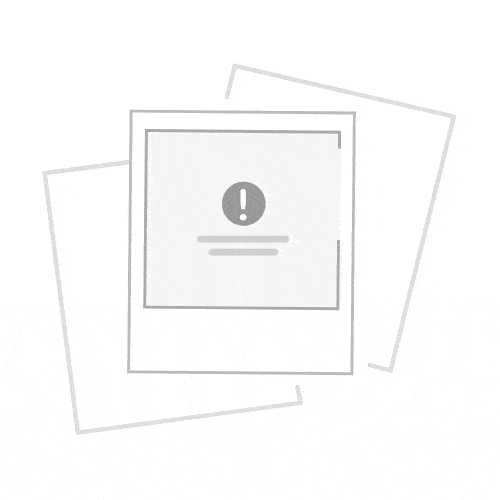

In [16]:
import requests
from PIL import Image
import io

# Get the first picture
picture_url = X_dataframe["pictures"].iloc[29][1]["url"]
response = requests.get(picture_url)
image = Image.open(io.BytesIO(response.content))
image


The images can't be accessed and the quality is always empty

#### quality

In [20]:
X_dataframe["pictures"].apply(lambda x: list(set([m["quality"] for m in x]))).value_counts()

pictures
[]    89297
[]      703
Name: count, dtype: int64

#### Max size

In [23]:
max_sizes = list(X_dataframe["pictures"].apply(
    lambda x: list(set([m["max_size"] for m in x]))
).value_counts().index)

In [26]:
max_sizes = list(set(sum(max_sizes, [])))
max_sizes

['',
 '443x170',
 '157x233',
 '847x803',
 '573x869',
 '901x676',
 '744x451',
 '347x304',
 '358x384',
 '595x460',
 '904x600',
 '427x700',
 '572x1000',
 '726x950',
 '658x892',
 '449x441',
 '975x730',
 '916x1180',
 '180x263',
 '804x1161',
 '1088x736',
 '240x250',
 '436x329',
 '375x498',
 '759x424',
 '510x375',
 '835x611',
 '1128x850',
 '758x566',
 '498x238',
 '717x203',
 '281x220',
 '296x363',
 '726x544',
 '645x740',
 '806x1200',
 '229x346',
 '724x485',
 '1024x646',
 '680x387',
 '271x217',
 '1200x877',
 '1200x422',
 '950x951',
 '255x562',
 '1022x341',
 '960x905',
 '757x757',
 '848x1088',
 '768x492',
 '497x945',
 '362x393',
 '1200x550',
 '422x480',
 '450x338',
 '493x340',
 '944x943',
 '1181x730',
 '619x413',
 '510x755',
 '304x502',
 '786x900',
 '399x303',
 '259x194',
 '325x425',
 '645x291',
 '319x401',
 '311x287',
 '850x774',
 '594x594',
 '433x207',
 '384x600',
 '426x211',
 '536x909',
 '300x333',
 '438x220',
 '698x897',
 '1200x894',
 '150x229',
 '392x581',
 '548x600',
 '429x322',
 '571x434

In [ ]:
def calculate_total_max_size(x: str):
    max_sizes = list(set([m["max_size"] for m in x]))
    max_size = 0
    for size in max_sizes:
        try:
            height = int(size.split("x")[0])
            width = int(size.split("x")[1])
            if height * width > max_size:
                max_size = height * width
        except:
            print("Error")
            print(size)
    return max_size

In [30]:
X_dataframe["total_max_size"] = X_dataframe["pictures"].apply(calculate_total_max_size)
X_dataframe["total_max_size"].value_counts()

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error

Error



total_max_size
1080000    24760
810000      3588
307200      3475
1440000     1610
250000      1437
           ...  
816059         1
646200         1
581120         1
380700         1
10584          1
Name: count, Length: 13001, dtype: int64

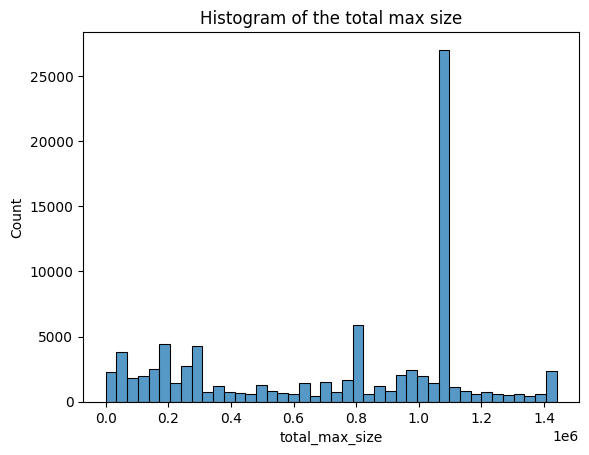

In [31]:
sns.histplot(X_dataframe["total_max_size"])
plt.title("Histogram of the total max size")
plt.show()


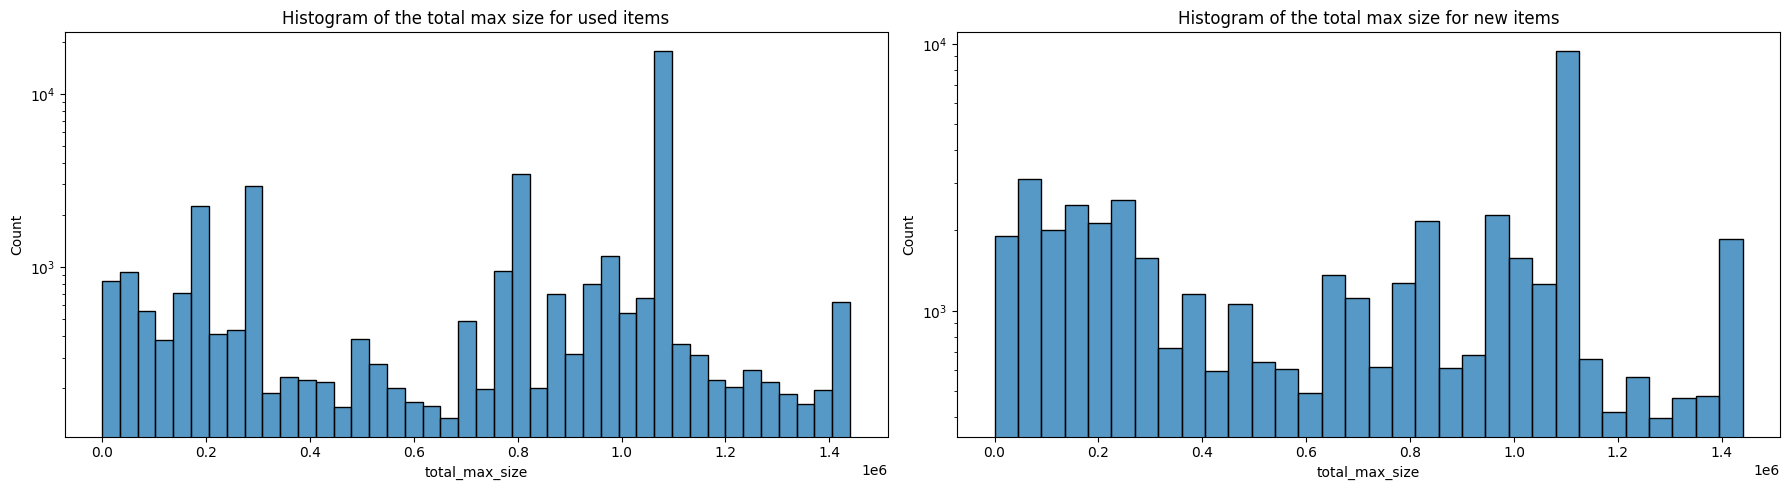

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["total_max_size"], ax=ax[0])
ax[0].set_title("Histogram of the total max size for used items")
ax[0].set_yscale("log")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["total_max_size"], ax=ax[1])
ax[1].set_title("Histogram of the total max size for new items")
ax[1].set_yscale("log")
plt.tight_layout()

There is a different distribution of the maximum max size of the image depending of the condition of the item

In [35]:
pearson_corr = X_dataframe[["used", "total_max_size"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "total_max_size"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "total_max_size"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                      used  total_max_size
used            1.000000        0.163425
total_max_size  0.163425        1.000000
Spearman correlation:                      used  total_max_size
used            1.000000        0.165147
total_max_size  0.165147        1.000000
Kendall correlation:                     used  total_max_size
used            1.00000         0.13918
total_max_size  0.13918         1.00000


The linear correlation is not strong

#### Size

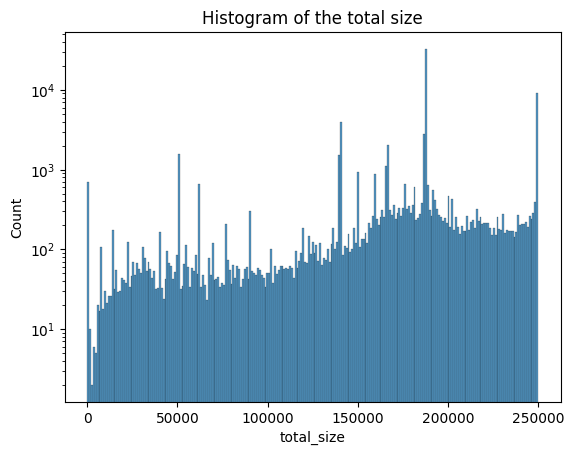

In [38]:
def calculate_total_size(x: str):
    sizes = list(set([m["size"] for m in x]))
    max_size = 0
    for size in sizes:
        try:
            height = int(size.split("x")[0])
            width = int(size.split("x")[1])
            if height * width > max_size:
                max_size = height * width
        except:
            print("Error")
            print(size)
    return max_size


X_dataframe["total_size"] = X_dataframe["pictures"].apply(calculate_total_size)
sns.histplot(X_dataframe["total_size"])
plt.title("Histogram of the total size")
plt.yscale("log")
plt.show()



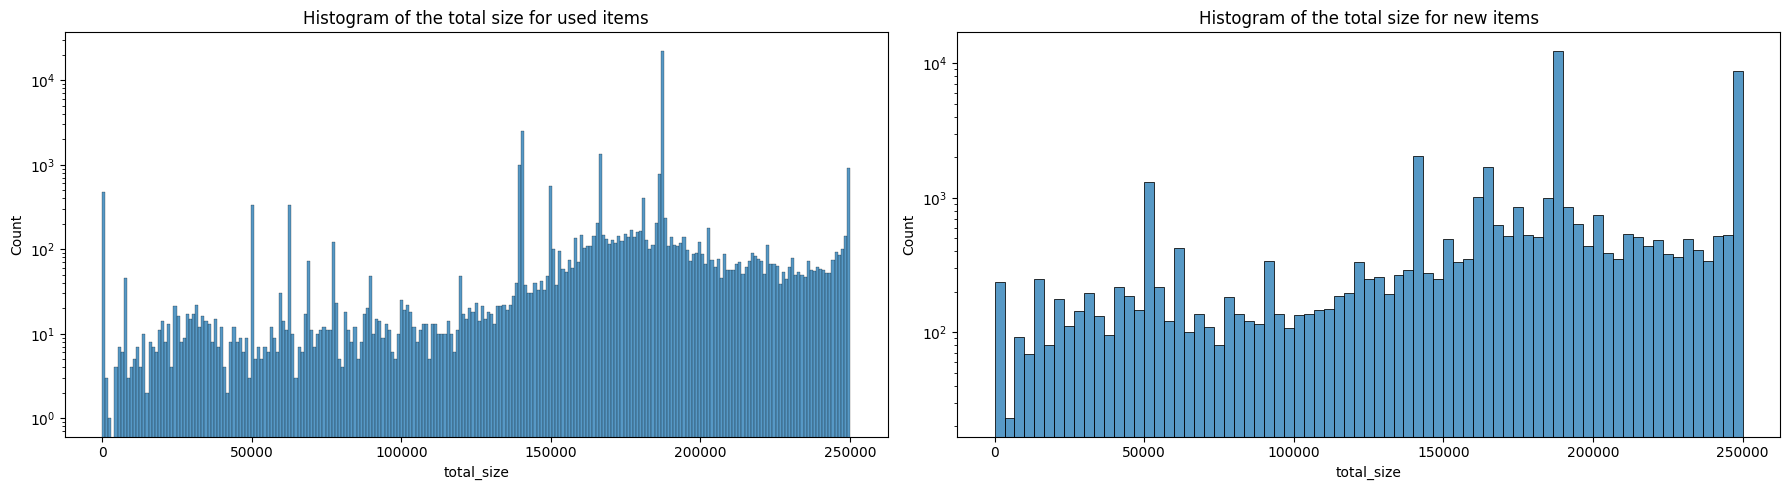

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["total_size"], ax=ax[0])
ax[0].set_title("Histogram of the total size for used items")
ax[0].set_yscale("log")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["total_size"], ax=ax[1])
ax[1].set_title("Histogram of the total size for new items")
ax[1].set_yscale("log")
plt.tight_layout()
plt.show()

Very similar distribution

In [40]:
pearson_corr = X_dataframe[["used", "total_size"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "total_size"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "total_size"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                  used  total_size
used        1.000000   -0.025311
total_size -0.025311    1.000000
Spearman correlation:                  used  total_size
used        1.000000   -0.086446
total_size -0.086446    1.000000
Kendall correlation:                 used  total_size
used        1.00000    -0.07439
total_size -0.07439     1.00000


The correlation is even smaller than the total size. Only using the max size as a feature

In [41]:
X_dataframe.drop(columns=["total_size", "pictures"], inplace=True)
X_dataframe.head()


,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,...,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,total_max_size
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,...,active,None,NaN,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,1080000
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,...,active,None,NaN,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,786432
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,...,active,None,NaN,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,1080000
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,...,active,None,NaN,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,186543
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,...,active,None,NaN,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,307200


### ID

In [42]:
X_dataframe["id"].describe()

count             90000
unique            90000
top       MLA4695330653
freq                  1
Name: id, dtype: object

Not valuable for this analysis

### Official Store ID

In [44]:
X_dataframe["official_store_id"].value_counts()

official_store_id
1580.0    37
6448.0    27
6732.0    23
4701.0    21
9218.0    20
          ..
7532.0     1
6106.0     1
8293.0     1
7248.0     1
4338.0     1
Name: count, Length: 193, dtype: int64

In [46]:
X_dataframe["official_store_id"].isnull().sum()/90000

np.float64(0.9917222222222222)

99% of the values are null. Not useful for this analysis

In [47]:
X_dataframe.drop(columns=["official_store_id"], inplace=True)
X_dataframe.head()

,seller_address,warranty,sub_status,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,...,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,used,total_max_size
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,...,active,None,NaN,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,0,1080000
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,...,active,None,NaN,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1,786432
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,...,active,None,NaN,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,1,1080000
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,...,active,None,NaN,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,0,186543
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,...,active,None,NaN,1,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1,307200


### Acepts MercadoPago

In [48]:
X_dataframe["accepts_mercadopago"].value_counts()

accepts_mercadopago
True     88018
False     1982
Name: count, dtype: int64

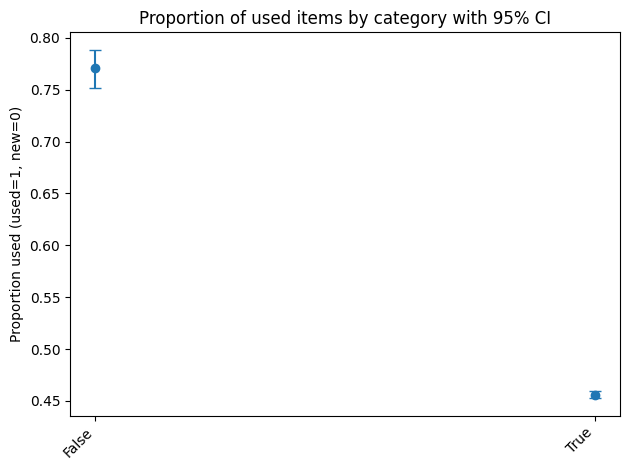

In [51]:
res = column_analysis("accepts_mercadopago", X_dataframe)
plot_column_analysis(res)

Not much information, so dropping it

In [54]:
X_dataframe.drop(columns=["accepts_mercadopago"], inplace=True)

### Original Price

In [55]:
X_dataframe["original_price"].describe()

count      130.000000
mean      1492.522308
std       1954.905741
min        120.000000
25%        449.000000
50%        850.000000
75%       1500.000000
max      12248.000000
Name: original_price, dtype: float64

In [64]:
X_dataframe["original_price"].isnull().sum()/90000

np.float64(0.9985555555555555)

More than 99% of the values are empty. Not useful for this analysis.

In [65]:
X_dataframe.drop(columns=["original_price"], inplace=True)

### Currency ID

In [66]:
X_dataframe["currency_id"].value_counts()

currency_id
ARS    89496
USD      504
Name: count, dtype: int64

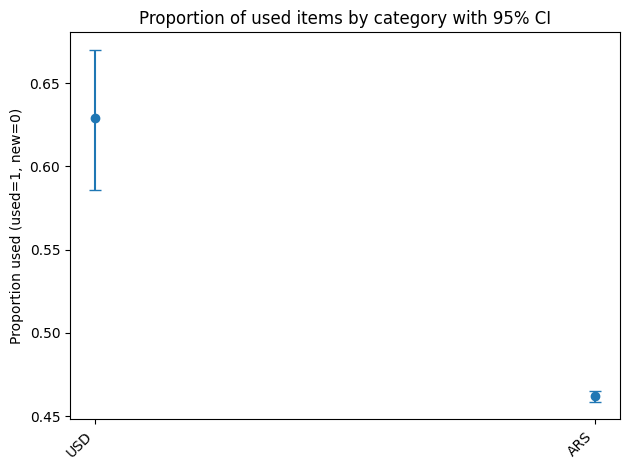

In [67]:
res = column_analysis("currency_id", X_dataframe)
plot_column_analysis(res)

Not much information as a feature of it's own

### Thumbnail

In [68]:
X_dataframe["thumbnail"].describe()

count     90000
unique    89260
top            
freq        703
Name: thumbnail, dtype: object

In [69]:
X_dataframe["thumbnail"].iloc[0]

'http://mla-s1-p.mlstatic.com/5386-MLA4695330653_052013-I.jpg'

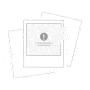

In [71]:
response = requests.get(X_dataframe["thumbnail"].iloc[90])
image = Image.open(io.BytesIO(response.content))
image

Not usable

In [72]:
X_dataframe.drop(columns=["thumbnail"], inplace=True)

### Automatic relist

In [73]:
X_dataframe["automatic_relist"].describe()

count     90000
unique        2
top       False
freq      85773
Name: automatic_relist, dtype: object

In [74]:
X_dataframe["automatic_relist"].value_counts()

automatic_relist
False    85773
True      4227
Name: count, dtype: int64

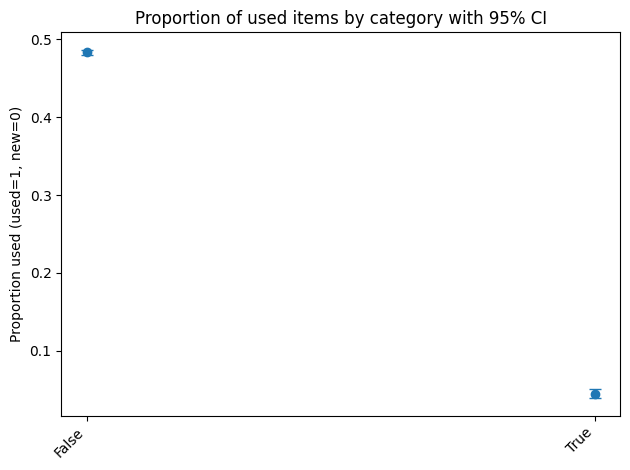

In [75]:
res = column_analysis("automatic_relist", X_dataframe)
plot_column_analysis(res)

Automatic relist==True is a good indicator of new item

### Date Created

In [76]:
X_dataframe["date_created"].describe()

count                        90000
unique                       79247
top       2015-09-03T20:22:05.000Z
freq                             7
Name: date_created, dtype: object

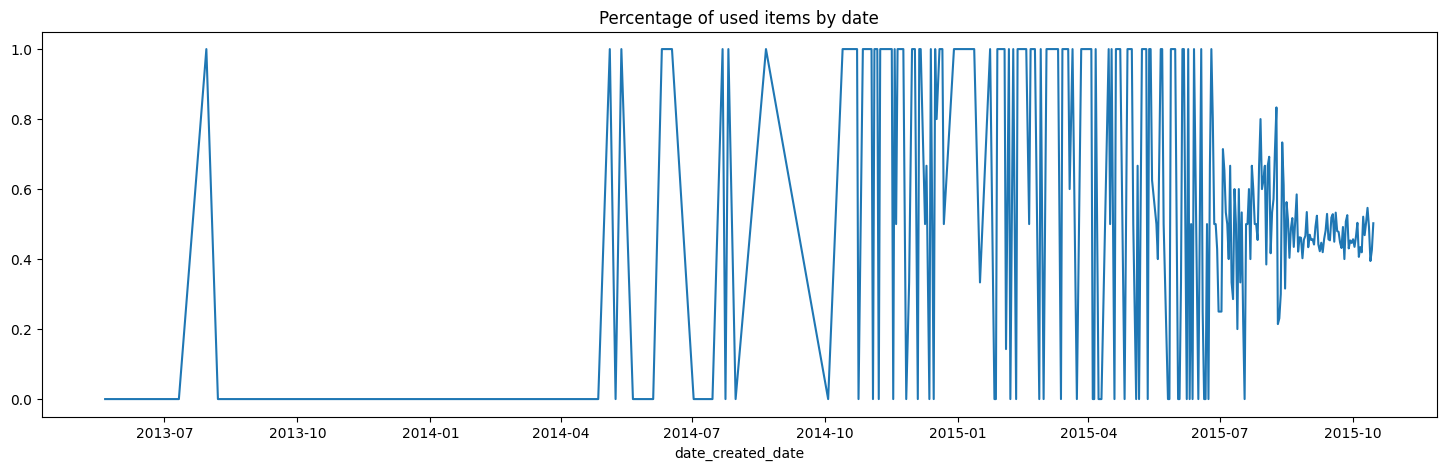

In [77]:
X_dataframe["date_created"] = pd.to_datetime(X_dataframe["date_created"])
X_dataframe["date_created_date"] = X_dataframe["date_created"].dt.date
plt.figure(figsize=(18, 5))
X_dataframe.groupby("date_created_date")["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

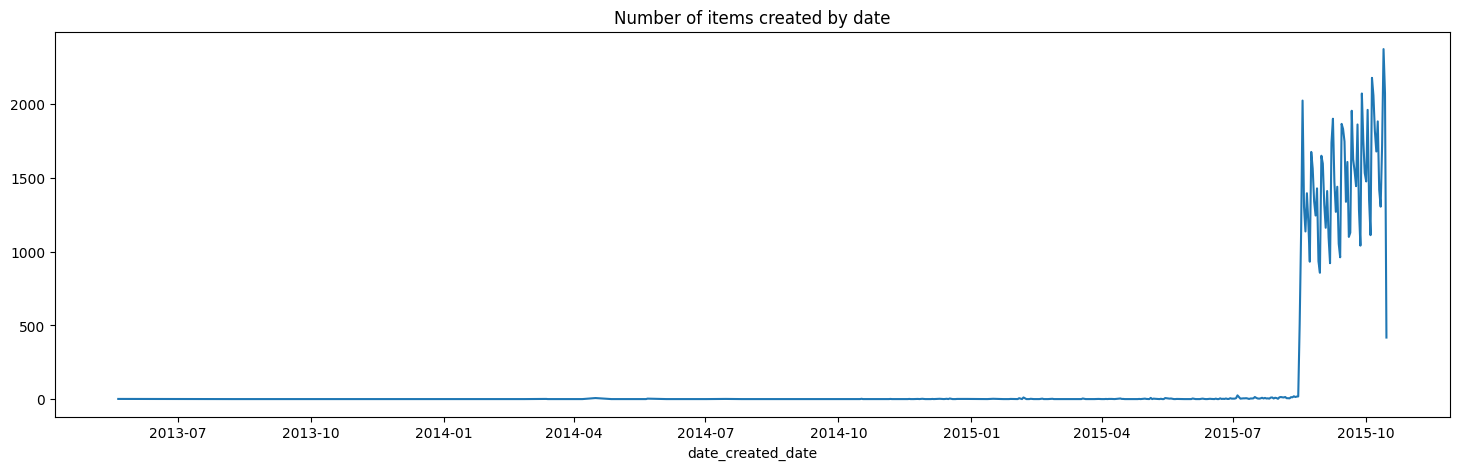

In [98]:
plt.figure(figsize=(18, 5))
X_dataframe["date_created_date"].value_counts().sort_index().plot(kind="line")
plt.title("Number of items created by date")
plt.show()


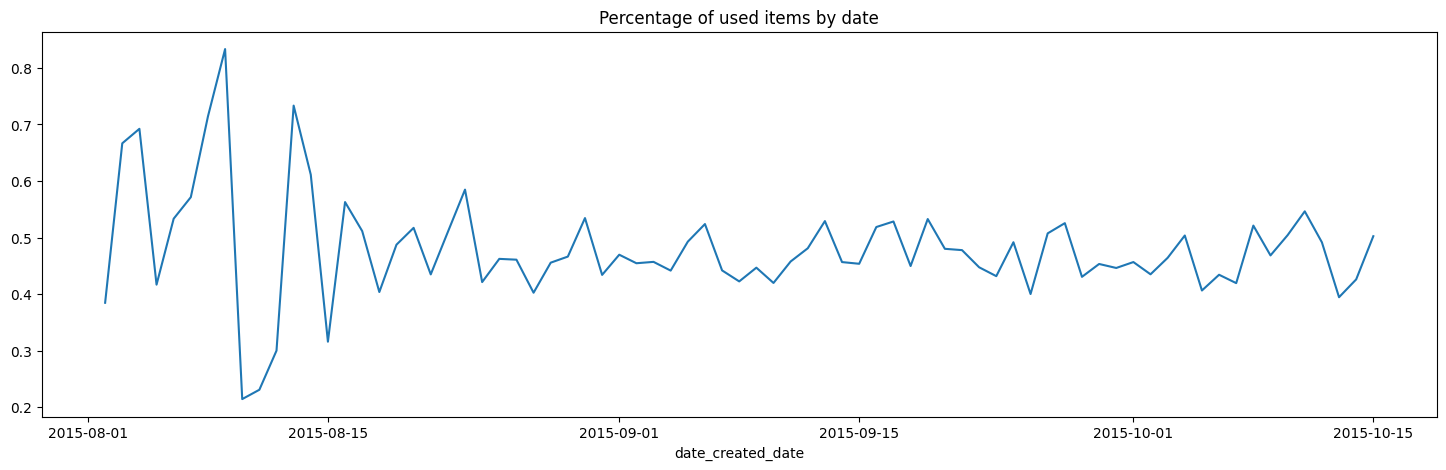

In [99]:
plt.figure(figsize=(18, 5))
X_dataframe.loc[X_dataframe["date_created_date"] > date(2015, 8, 1)].groupby(
    "date_created_date"
)["used"].mean().plot(kind="line")
plt.title("Percentage of used items by date")
plt.show()

The data was created mostly after august 2015. This is too short time period to do any analysis about it

### Secure Thumbnail

In [101]:
X_dataframe["secure_thumbnail"].describe()

count     90000
unique    89260
top            
freq        703
Name: secure_thumbnail, dtype: object

In [102]:
X_dataframe["secure_thumbnail"].value_counts()

secure_thumbnail
                                                                                     703
https://www.mercadolibre.com/jm/img?s=STC&v=I&f=proccesing_image_es.jpg               35
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/6279-MLApp_27_21489919_1-I.jpg         4
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/6270-MLApp_27_19602074_1-I.jpg         2
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/511801-MLA5521774469_092015-I.jpg      1
                                                                                    ... 
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/6091-MLA3556211925_062013-I.jpg        1
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/735901-MLA2058662691_092015-I.jpg      1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/13384-MLA4708780549_042014-I.jpg       1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/13656-MLA1151691589_102012-I.jpg       1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/716501-MLA8241142190_082015-I.jpg      1
Name

Not much information here

In [103]:
X_dataframe.drop(columns=["secure_thumbnail"], inplace=True)

### Stop Time

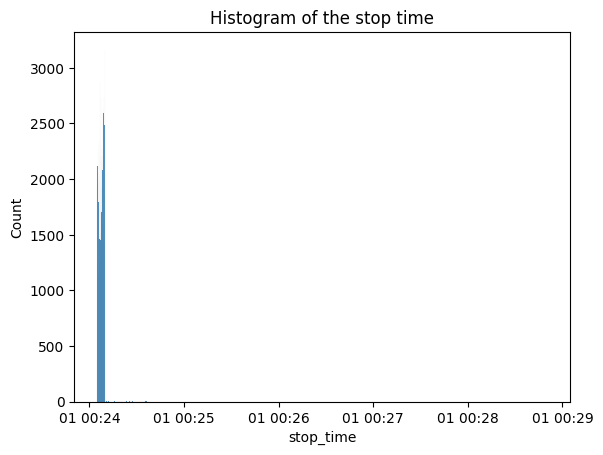

In [116]:
X_dataframe["stop_time"].describe()

# to datetime
X_dataframe["stop_time"] = pd.to_datetime(X_dataframe["stop_time"])
X_dataframe["stop_time_date"] = X_dataframe["stop_time"].dt.date

sns.histplot(X_dataframe["stop_time"])
plt.title("Histogram of the stop time")
plt.show()


In [105]:
X_dataframe["stop_time"].value_counts()

stop_time
1446584296000    19
1446858780000    17
1447009249000    17
1447384665000    15
1446325154000    13
                 ..
1447014766000     1
1448935053000     1
1449884024000     1
1447418520000     1
1449878053000     1
Name: count, Length: 78486, dtype: int64

In [106]:
X_dataframe["stop_time"].isnull().sum()/90000

np.float64(0.0)

In [143]:
def time_to_seconds(t):
    if pd.isna(t):
        return np.nan
    return t.hour * 3600 + t.minute * 60 + t.second


X_dataframe["stop_time_seconds"] = X_dataframe["stop_time"].dt.time.apply(
    time_to_seconds
)
p_correlation = X_dataframe[["used", "stop_time_seconds"]].corr()
kendall_correlation = X_dataframe[["used", "stop_time_seconds"]].corr(method="kendall")
print("Pearson correlation: ", p_correlation)
print("Kendall correlation: ", kendall_correlation)


Pearson correlation:                         used  stop_time_seconds
used               1.000000          -0.017107
stop_time_seconds -0.017107           1.000000
Kendall correlation:                        used  stop_time_seconds
used               1.00000           -0.02173
stop_time_seconds -0.02173            1.00000


In [144]:
X_dataframe.drop(columns=["stop_time", "stop_time_seconds", "stop_time_date"], inplace=True)

### Start Time

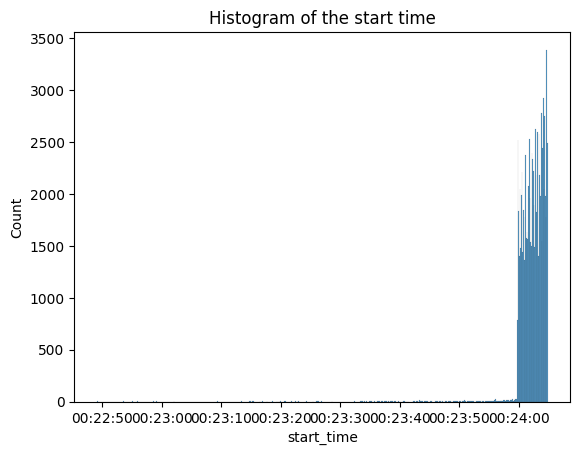

In [148]:
X_dataframe["start_time"].describe()
X_dataframe["start_time"] = pd.to_datetime(X_dataframe["start_time"])
X_dataframe["start_time_date"] = X_dataframe["start_time"].dt.date
sns.histplot(X_dataframe["start_time"])
plt.title("Histogram of the start time")
plt.show()


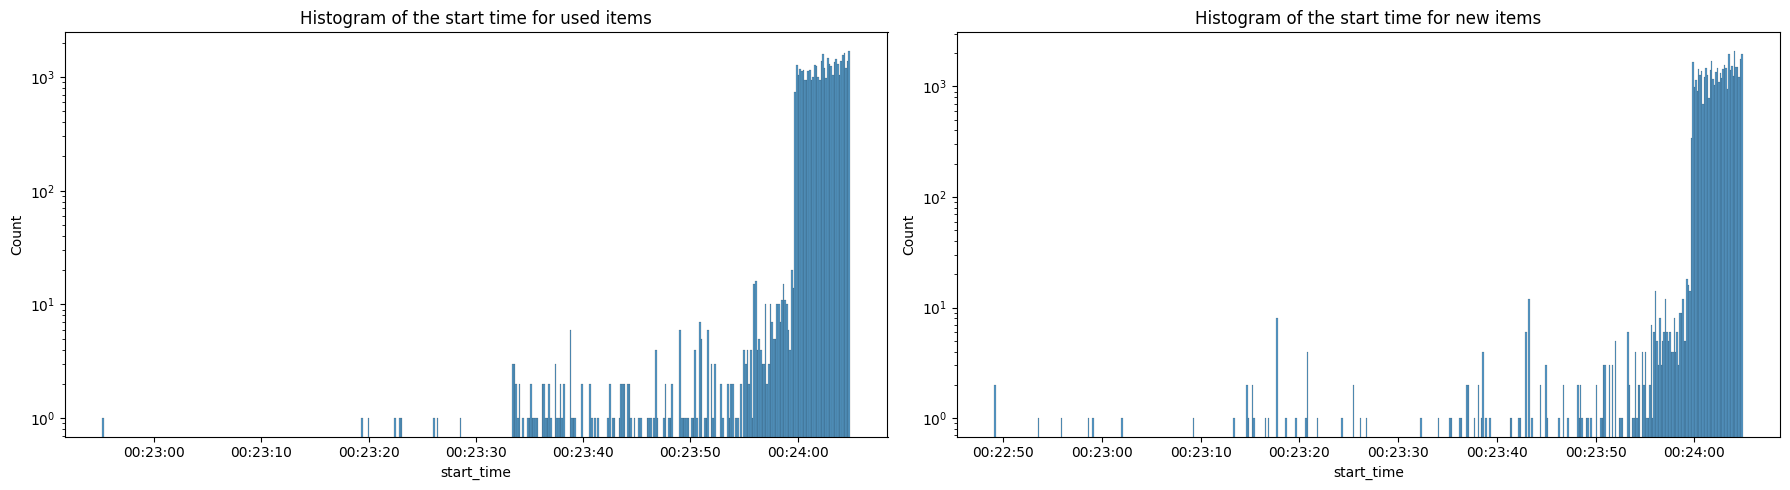

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["start_time"], ax=ax[0])
ax[0].set_title("Histogram of the start time for used items")
ax[0].set_yscale("log")

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["start_time"], ax=ax[1])
ax[1].set_title("Histogram of the start time for new items")
ax[1].set_yscale("log")
plt.tight_layout()
plt.show()



Not different distributions

In [150]:
X_dataframe.drop(columns=["start_time", "start_time_date"], inplace=True)

### Status

In [119]:
X_dataframe["status"].describe()

count      90000
unique         4
top       active
freq       86116
Name: status, dtype: object

In [120]:
X_dataframe["status"].value_counts()

status
active            86116
paused             3863
closed               20
not_yet_active        1
Name: count, dtype: int64

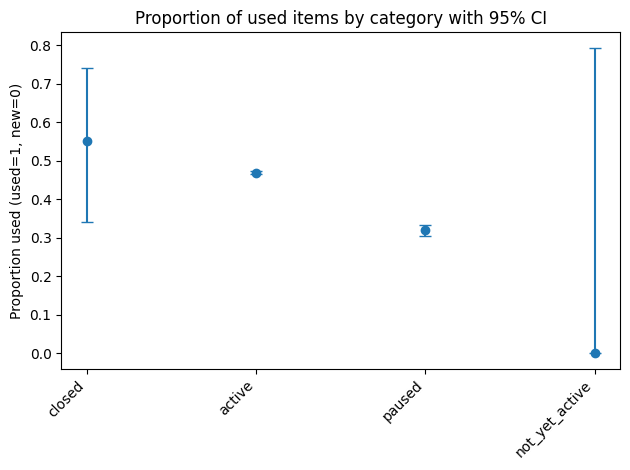

In [121]:
res = column_analysis("status", X_dataframe)
plot_column_analysis(res)


Not useful as feature or this analysis

In [122]:
X_dataframe.drop(columns=["status"], inplace=True)

### Video ID

In [130]:
X_dataframe["video_id"].isnull().sum()/90000

np.float64(0.9702666666666667)

Too much nulls and not much information

In [131]:
X_dataframe.drop(columns=["video_id"], inplace=True)

### Catalog Product ID

In [133]:
X_dataframe["catalog_product_id"].describe()

count    7.000000e+00
mean     2.895700e+06
std      1.919771e+06
min      9.440400e+04
25%      1.925518e+06
50%      3.051112e+06
75%      4.073615e+06
max      5.126117e+06
Name: catalog_product_id, dtype: float64

In [134]:
X_dataframe["catalog_product_id"].value_counts()

catalog_product_id
800744.0     1
5093232.0    1
3050291.0    1
5126117.0    1
94404.0      1
3051112.0    1
3053998.0    1
Name: count, dtype: int64

Not much information.

In [135]:
X_dataframe.drop(columns=["catalog_product_id"], inplace=True)

### Initial Quantity

In [136]:
X_dataframe["initial_quantity"].describe()

count    90000.000000
mean        34.957178
std        421.091981
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: initial_quantity, dtype: float64

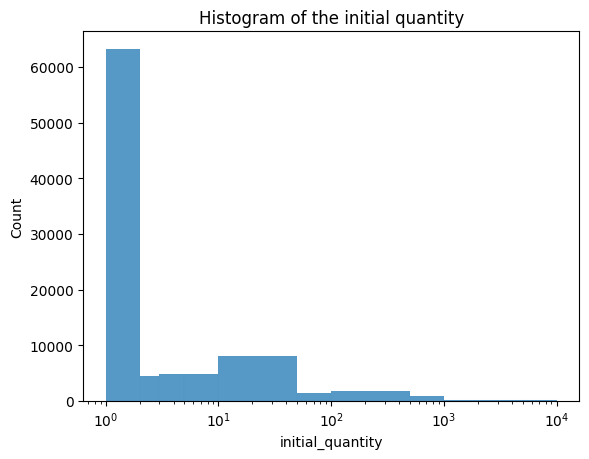

In [140]:
sns.histplot(X_dataframe["initial_quantity"], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
plt.title("Histogram of the initial quantity")
plt.xscale("log")
plt.show()


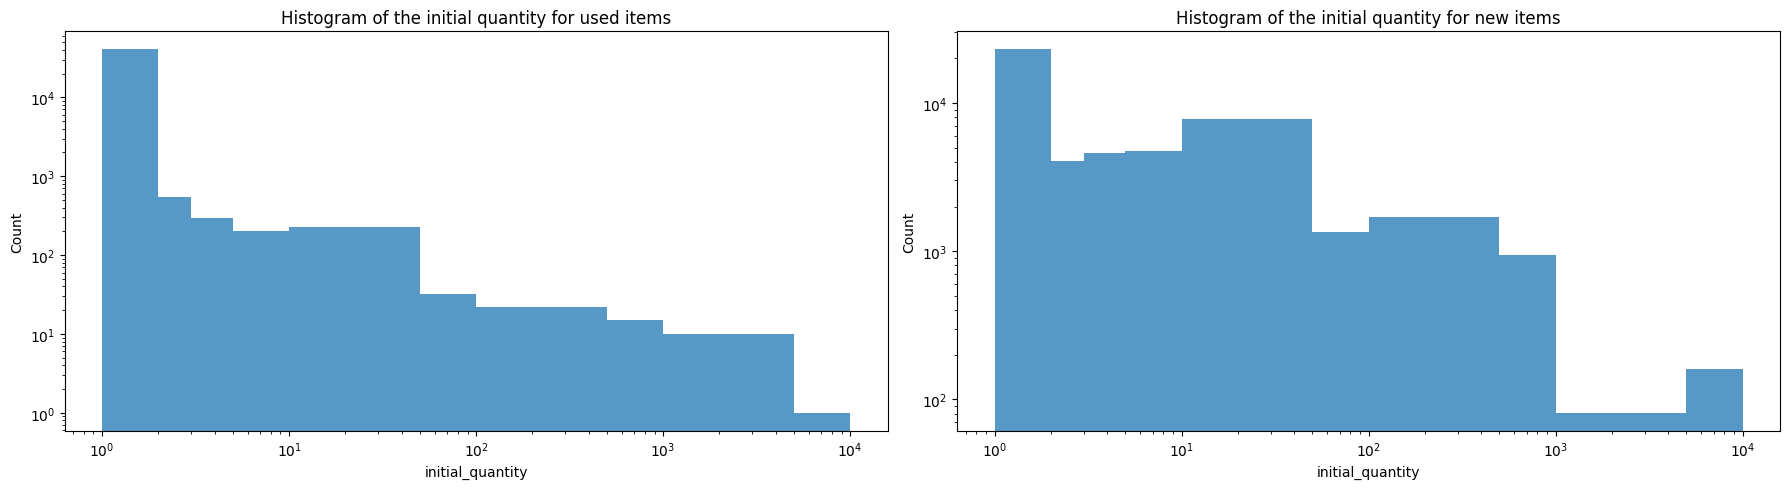

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["initial_quantity"], ax=ax[0], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["initial_quantity"], ax=ax[1], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()



In [158]:
X_dataframe["new"] = X_dataframe["used"] == 0

pearson_corr = X_dataframe[["new", "initial_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "initial_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "initial_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                         new  initial_quantity
new               1.000000          0.072434
initial_quantity  0.072434          1.000000
Spearman correlation:                         new  initial_quantity
new               1.000000          0.533531
initial_quantity  0.533531          1.000000
Kendall correlation:                         new  initial_quantity
new               1.000000          0.498395
initial_quantity  0.498395          1.000000


### Permalink

In [151]:
X_dataframe["permalink"].describe()

count                                                 90000
unique                                                90000
top       http://articulo.mercadolibre.com.ar/MLA4695330...
freq                                                      1
Name: permalink, dtype: object

In [152]:
X_dataframe.drop(columns=["permalink"], inplace=True)

### Available Quantity

In [153]:
X_dataframe["available_quantity"].describe()

count    90000.000000
mean        34.700767
std        420.811703
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: available_quantity, dtype: float64

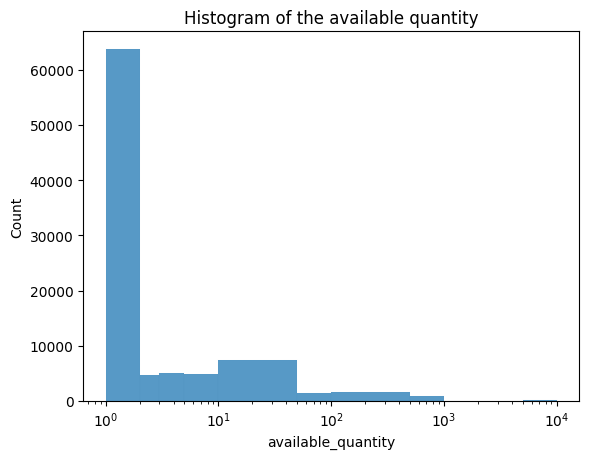

In [154]:
sns.histplot(
    X_dataframe["available_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the available quantity")
plt.xscale("log")
plt.show()

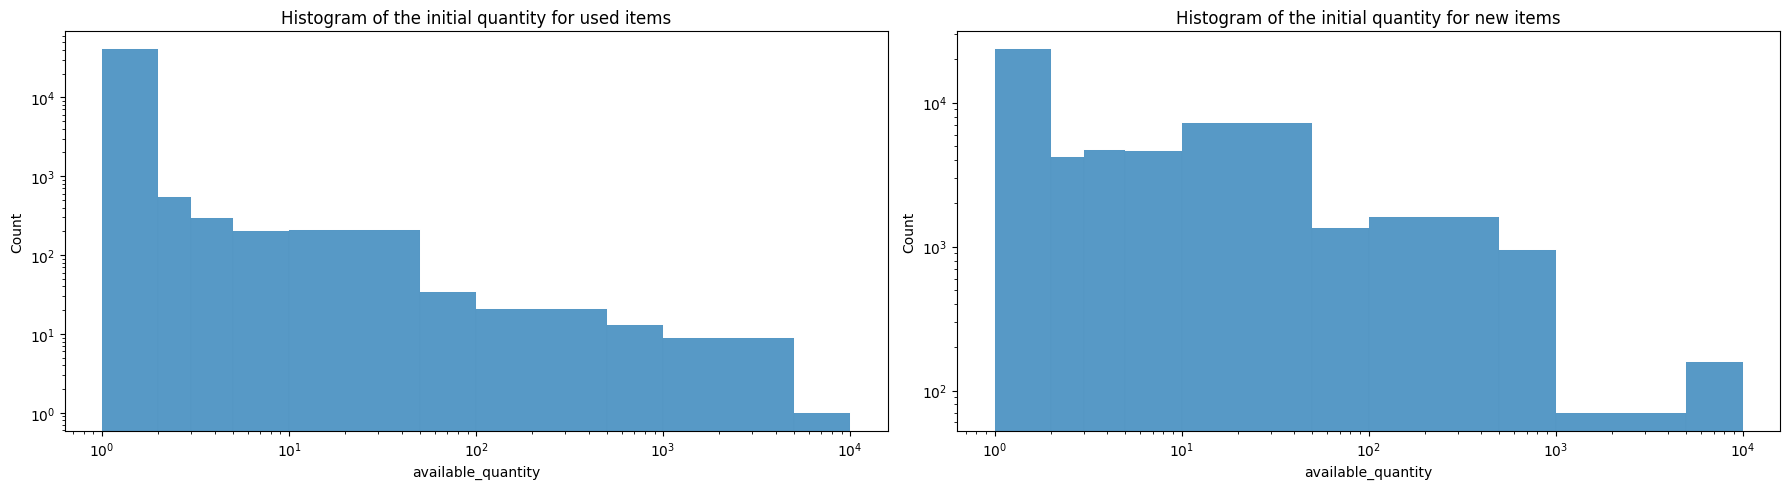

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["available_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["available_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()

In [157]:
X_dataframe["new"] = X_dataframe["used"] == 0



pearson_corr = X_dataframe[["new", "available_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "available_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "available_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                           new  available_quantity
new                 1.000000            0.071967
available_quantity  0.071967            1.000000
Spearman correlation:                           new  available_quantity
new                 1.000000            0.526895
available_quantity  0.526895            1.000000
Kendall correlation:                           new  available_quantity
new                 1.000000            0.492828
available_quantity  0.492828            1.000000


### Sold Quantity

In [159]:
X_dataframe["sold_quantity"].describe()

count    90000.000000
mean         2.328044
std         33.839328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6065.000000
Name: sold_quantity, dtype: float64

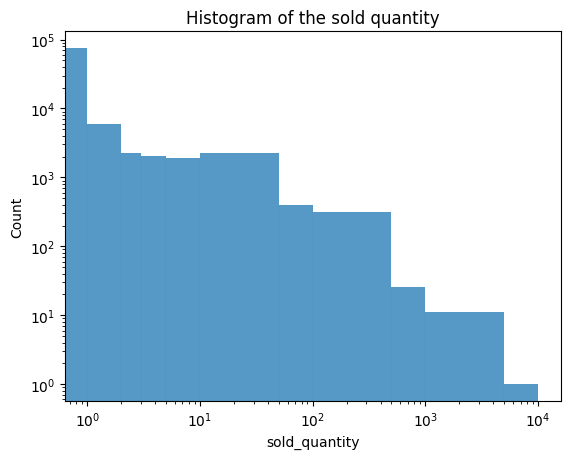

In [161]:
sns.histplot(
    X_dataframe["sold_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the sold quantity")
plt.xscale("log")
plt.yscale("log")
plt.show()

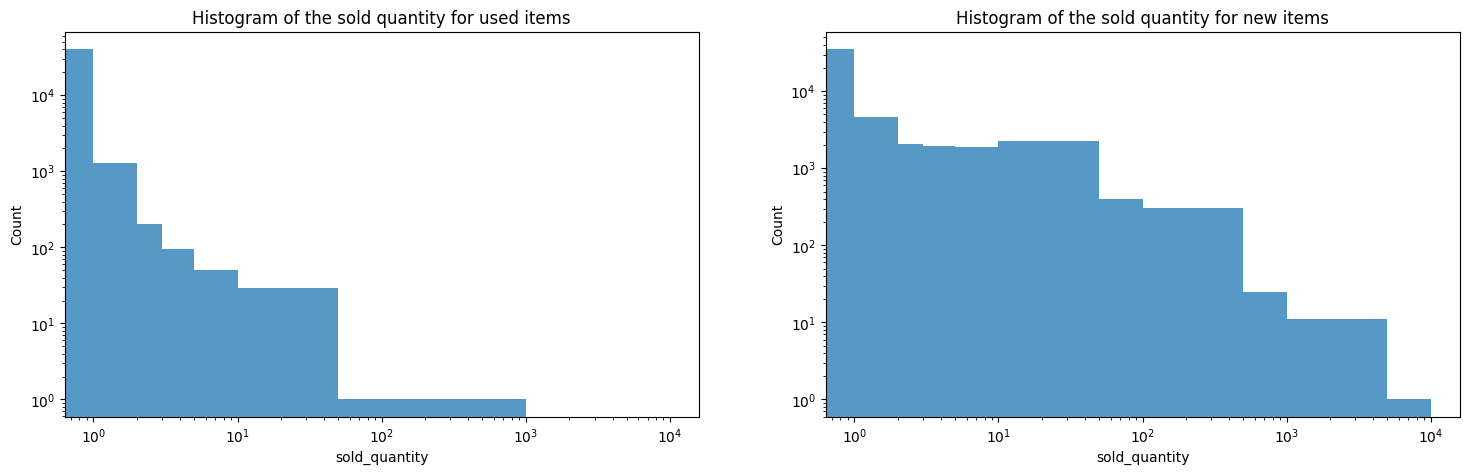

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["sold_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the sold quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["sold_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the sold quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")

plt.show()

In [165]:
pearson_corr = X_dataframe[["new", "available_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "available_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "available_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                           new  available_quantity
new                 1.000000            0.071967
available_quantity  0.071967            1.000000
Spearman correlation:                           new  available_quantity
new                 1.000000            0.526895
available_quantity  0.526895            1.000000
Kendall correlation:                           new  available_quantity
new                 1.000000            0.492828
available_quantity  0.492828            1.000000


### Title

In [167]:
X_dataframe["title"].describe()

count                                             90000
unique                                            89008
top       50 Suspensores Para Short De Baño Tela Calada
freq                                                 66
Name: title, dtype: object

In [168]:
X_dataframe["title"].value_counts()

title
50 Suspensores Para Short De Baño Tela Calada                66
50 Suspensores Para Short De Baño Nido De Abeja              45
Confeccion Short De Baño Bermudas Hombre Y Niño              32
50 Suspensores Para Short De Baño Tela Nido De Abeja         30
Camisas Corte Y Confeccion Producto Terminado                30
                                                             ..
Juana De Arco En La Hoguera. Paul Claudel.1948                1
La Prueba   Peter Veres                                       1
Cuchillo Puma Outdoor 6378                                    1
Globo Peppa Pig X 10 Metalizado Mas Varillas Y Canastillo     1
Campera De Mujer Tucci Reversible                             1
Name: count, Length: 89008, dtype: int64

In [230]:
X_dataframe["title"].apply(typical_string_processing).value_counts()[30:]

title
casa ladrillo construccion rapida material prefabricada       4
mesa ratona                                                   4
cuadro                                                        4
zapatos mujer                                                 4
vestido de fiesta                                             4
                                                             ..
camiseta rugby del leicester - temporada 2013                 1
el gallito de la torre agata susaeta antiguo infantil 1970    1
soga p/ saltar entrenamiento crossfit aerobic alta calidad    1
recuerdo - castillo a -nuevo cd #db3                          1
campera de mujer tucci reversible                             1
Name: count, Length: 88952, dtype: int64